# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Libraries**

In [2]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm



import warnings 
%matplotlib inline 
pd.options.display.max_columns=999
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Dataset Overview**

**Import Dataset**

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Seoul Bike Prediction/SeoulBikeData.csv",encoding= 'unicode_escape')

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Statistical Summary**

In [6]:
#Statistical Information
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Observations:

* Count of all features is same: 8760 i.e., No missings values
* Minimum and maximum number of bikes rented/day is 0 and 3556 resp.
* Average number of bikes rented/day = 704

**Data Properties**

In [7]:
#datatype and count information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#check unique values of the features
data.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Observation:

* Data is recorded for:
    * 365 days and throughout the day(24 hours).
    * 4 different seasons 
    * Holiday and No Holiday Days
    * Functioning and No Functioning Days

#**Exploratory Data Analysis**

**Missing Value Analysis**

In [9]:
#confirm the null values 
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

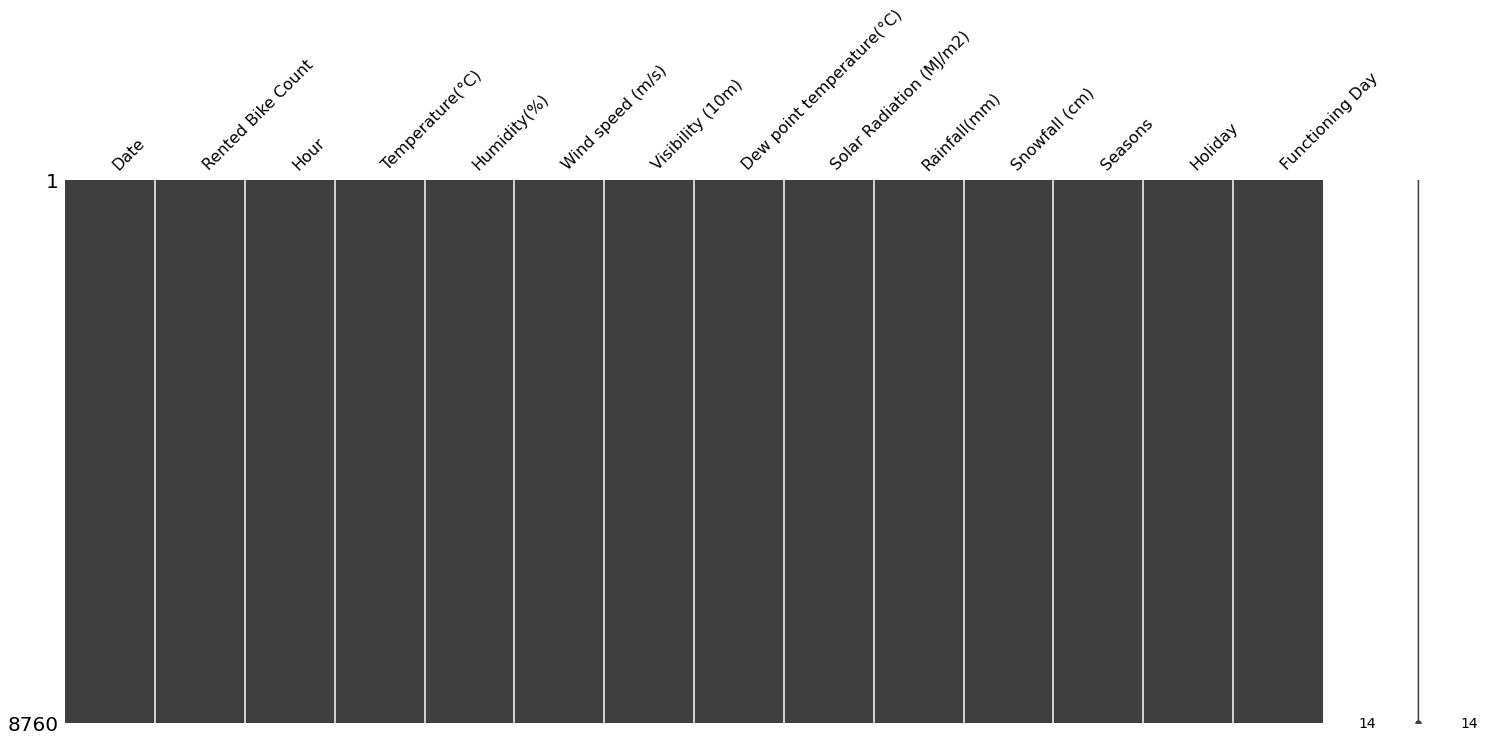

In [10]:
# Checking missing values
import missingno as msno
msno.matrix(data)


No missing values in any of the features.

In [11]:
#rename the column names for easy access
data.rename(columns={'Temperature(°C)':'Temperature', 'Humidity(%)': 'Humidity','Wind speed (m/s)': 'Wind Speed',"Dew point temperature(°C)": 'Dew point temperature','Visibility (10m)':'Visibility', "Solar Radiation (MJ/m2)": 'Solar radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)': 'Snowfall' },inplace=True)

In [12]:
data['Date']=pd.to_datetime(data["Date"])
data['Month']=data['Date'].dt.month


In [13]:
# change the datatype of categorical columns to categorical 
categorical_cols=['Seasons','Holiday','Functioning Day','Hour',"Date","Month"]
for col in categorical_cols:
  data[col]=data[col].astype("category")
Numerical_cols=['Temperature','Humidity','Visibility','Wind Speed','Dew point temperature','Solar radiation','Rainfall','Snowfall']
for col in Numerical_cols :
  data[col] = data[col].astype('float64')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   8760 non-null   category
 1   Rented Bike Count      8760 non-null   int64   
 2   Hour                   8760 non-null   category
 3   Temperature            8760 non-null   float64 
 4   Humidity               8760 non-null   float64 
 5   Wind Speed             8760 non-null   float64 
 6   Visibility             8760 non-null   float64 
 7   Dew point temperature  8760 non-null   float64 
 8   Solar radiation        8760 non-null   float64 
 9   Rainfall               8760 non-null   float64 
 10  Snowfall               8760 non-null   float64 
 11  Seasons                8760 non-null   category
 12  Holiday                8760 non-null   category
 13  Functioning Day        8760 non-null   category
 14  Month                  8760 non-null   c

**Outlier Analysis**

<Figure size 720x360 with 0 Axes>

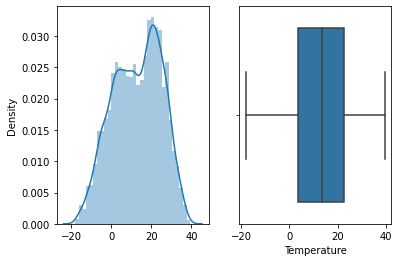

<Figure size 720x360 with 0 Axes>

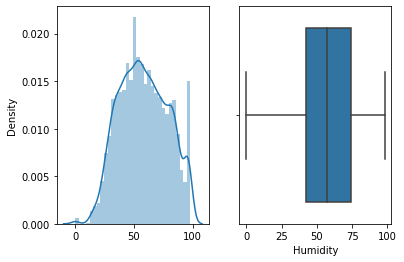

<Figure size 720x360 with 0 Axes>

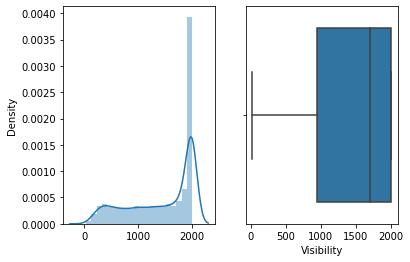

<Figure size 720x360 with 0 Axes>

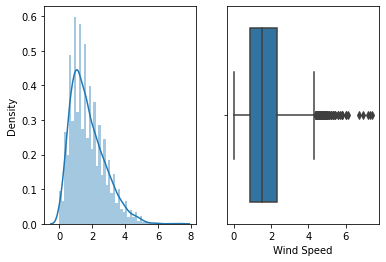

<Figure size 720x360 with 0 Axes>

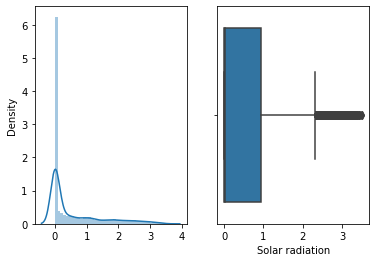

<Figure size 720x360 with 0 Axes>

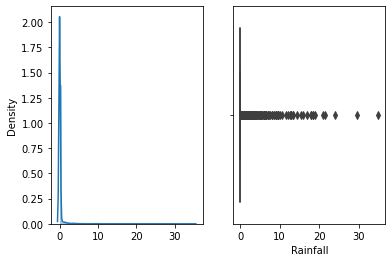

<Figure size 720x360 with 0 Axes>

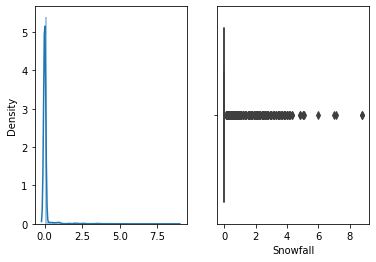

<Figure size 720x360 with 0 Axes>

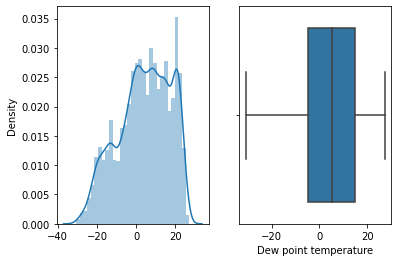

<Figure size 720x360 with 0 Axes>

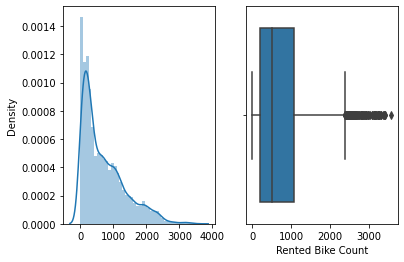

In [14]:
numerical_cols = ['Temperature','Humidity','Visibility','Wind Speed','Solar radiation','Rainfall','Snowfall','Dew point temperature', 'Rented Bike Count']

for col in numerical_cols[0:]:
    fig = plt.figure(figsize=(10,5))

    feature=data[col]
    fig, axes = plt.subplots(1, 2)
    sns.distplot(x=feature,ax=axes[0])
    sns.boxplot(x=feature,ax=axes[1])
plt.show()

Observation:

* Features namely, Wind Speed, Solar Radiation, Rainfall, Snowfall have outliers.
* Dependent variable 'Rented Bike Count' has outliers.

<Figure size 720x360 with 0 Axes>

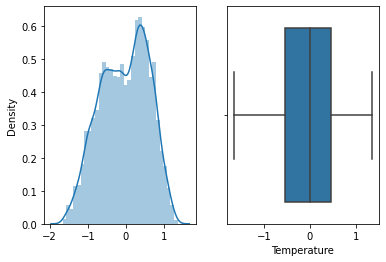

<Figure size 720x360 with 0 Axes>

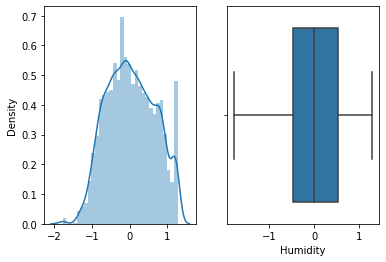

<Figure size 720x360 with 0 Axes>

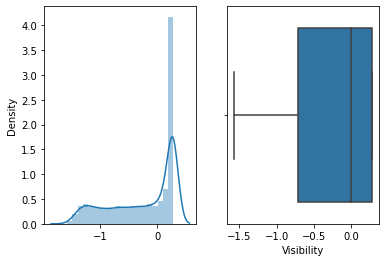

<Figure size 720x360 with 0 Axes>

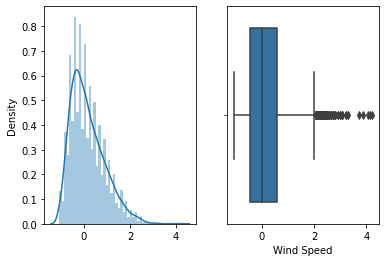

<Figure size 720x360 with 0 Axes>

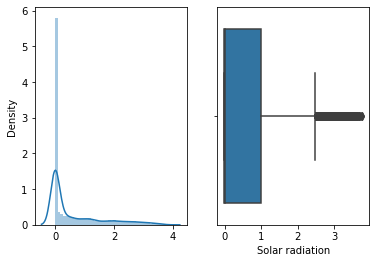

<Figure size 720x360 with 0 Axes>

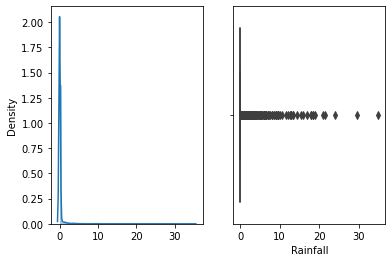

<Figure size 720x360 with 0 Axes>

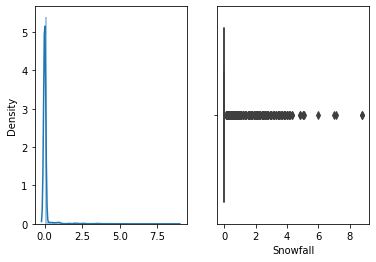

<Figure size 720x360 with 0 Axes>

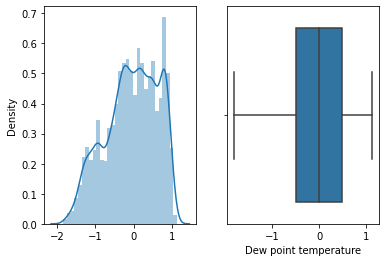

<Figure size 720x360 with 0 Axes>

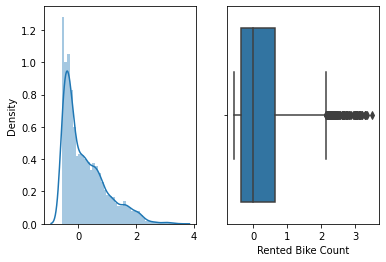

In [15]:
from sklearn.preprocessing import RobustScaler
numerical_cols = ['Temperature','Humidity','Visibility','Wind Speed','Solar radiation','Rainfall','Snowfall','Dew point temperature', 'Rented Bike Count']
scaler = RobustScaler()
t=data.copy(deep='True')
t[numerical_cols]= scaler.fit_transform(data[numerical_cols])


for col in numerical_cols[0:]:
    fig = plt.figure(figsize=(10,5))
    feature=t[col]
    fig, axes = plt.subplots(1, 2)
    sns.distplot(x=feature,ax=axes[0])
    sns.boxplot(x=feature,ax=axes[1])
plt.show()


In [16]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month
0,2017-01-12,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,2018-11-30,764,20,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,2018-11-30,694,21,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,2018-11-30,712,22,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


In [17]:
t

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month
0,2017-01-12,-0.286531,0,-0.994737,-0.62500,0.500000,0.284906,-1.164103,-0.010753,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,-0.343723,1,-1.010526,-0.59375,-0.500000,0.284906,-1.164103,-0.010753,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,-0.379182,2,-1.036842,-0.56250,-0.357143,0.284906,-1.169231,-0.010753,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,-0.454675,3,-1.047368,-0.53125,-0.428571,0.284906,-1.164103,-0.010753,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,-0.487847,4,-1.036842,-0.65625,0.571429,0.284906,-1.215385,-0.010753,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,0.570203,19,-0.500000,-0.71875,0.785714,0.184906,-0.789744,-0.010753,0.0,0.0,Autumn,No Holiday,Yes,11
8756,2018-11-30,0.296826,20,-0.542105,-0.62500,0.571429,0.284906,-0.769231,-0.010753,0.0,0.0,Autumn,No Holiday,Yes,11
8757,2018-11-30,0.216757,21,-0.584211,-0.56250,-0.857143,0.254717,-0.769231,-0.010753,0.0,0.0,Autumn,No Holiday,Yes,11
8758,2018-11-30,0.237346,22,-0.610526,-0.50000,-0.357143,0.151887,-0.764103,-0.010753,0.0,0.0,Autumn,No Holiday,Yes,11


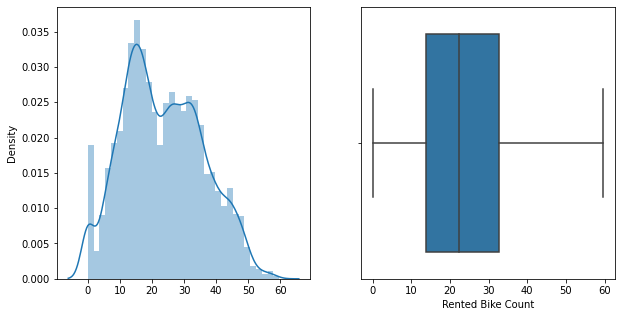

In [18]:
 #Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.distplot(x=np.sqrt(data['Rented Bike Count']),ax=axes[0])
sns.boxplot(x=np.sqrt(data['Rented Bike Count']),ax=axes[1])

**Correlation Analysis**

Heatmap (correlation matrix)

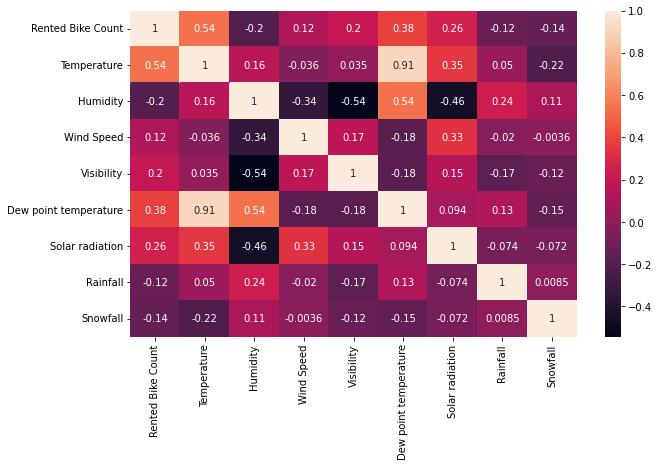

In [19]:
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

Regression Plots 

<Figure size 720x432 with 0 Axes>

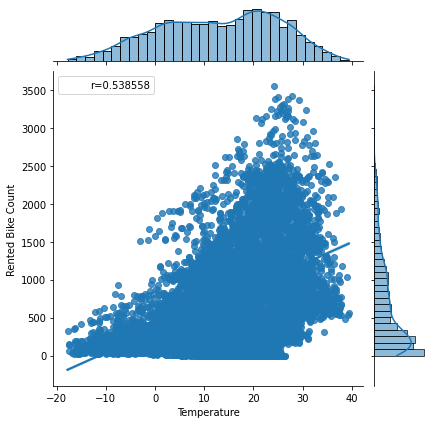

<Figure size 720x432 with 0 Axes>

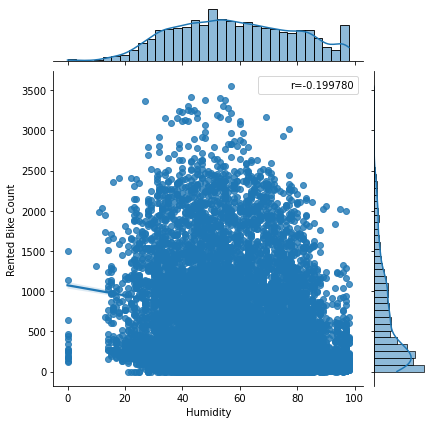

<Figure size 720x432 with 0 Axes>

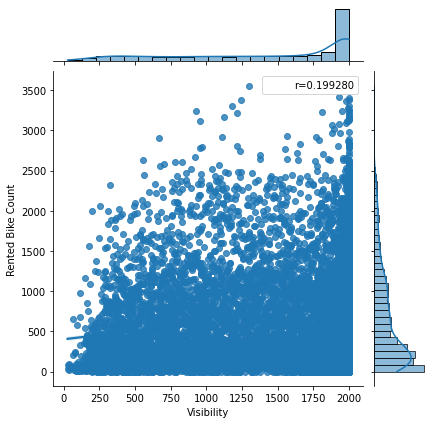

<Figure size 720x432 with 0 Axes>

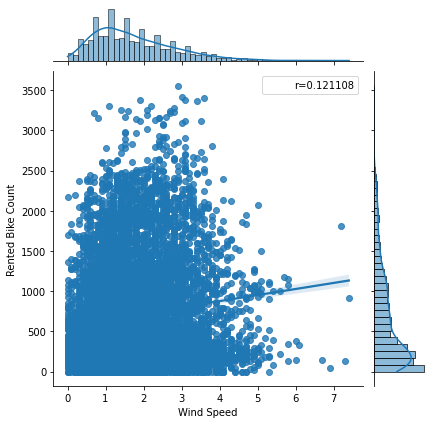

<Figure size 720x432 with 0 Axes>

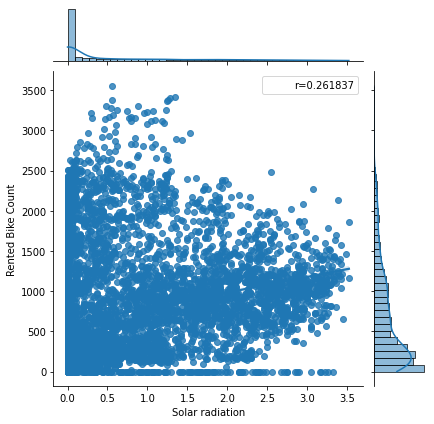

<Figure size 720x432 with 0 Axes>

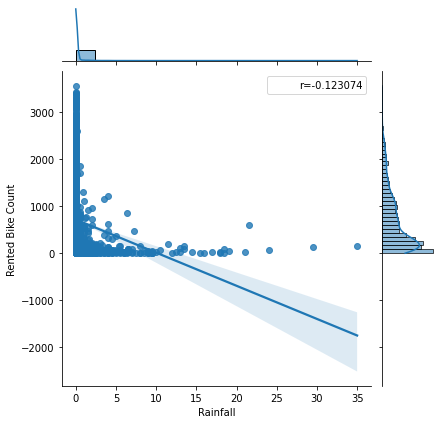

<Figure size 720x432 with 0 Axes>

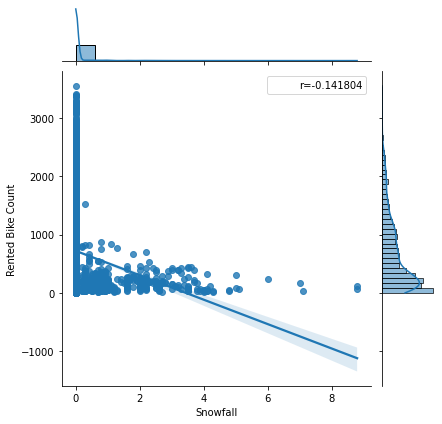

In [20]:
#plotting regression plot for the numerical features v/s bike rental count 
numerical_cols = ['Temperature','Humidity','Visibility','Wind Speed','Solar radiation','Rainfall','Snowfall']
for col in numerical_cols[0:]:
    fig = plt.figure(figsize=(10, 6))
    feature = data[col]
    label = data['Rented Bike Count']
    graph = sns.jointplot(data=data,x=feature, y=label,kind='reg')
    r, p = stats.pearsonr(feature, label)
    phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
    graph.ax_joint.legend([phantom],['r={:f}'.format(r)])
plt.show()

Observation:

* Temperature has a correlation (0.54) with the count of bike-rents.
* Temperature and dew-point temperature are highly correlated. One of the features could be dropped later.
* Humidity is positively correlated(0.54) with dew-point temperature as much as it is negatively correlated(-0.54) with Visibility.
* Solar Radiation has a slight negative correlation with Humidity.
* Wind Speed, Rainfall and Snowfall have very less impact on the count of bike-rents. 

**Univariate Analysis**

Bike Rental Count at particular hour of the day

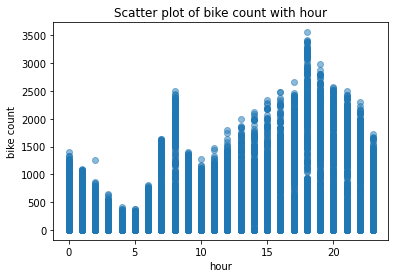

In [21]:
plt.scatter(data['Hour'], data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()


Bike rentals are the highest during 8:00 am and 6:00 pm, indicating the peak hours.



Bike Rental Count v/s Year 

[Text(0.5, 1.0, 'Bike Rent Count per year')]

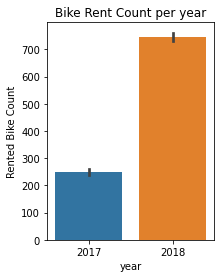

In [22]:
# extract year from the feature "date" to create "year"
year =[]
for i in range(len(data['Date'])):
  year.append(data['Date'][i].year)
data['year'] = year
fig, ax=plt.subplots(figsize=(3,4))
sns.barplot(data=data,x='year',y='Rented Bike Count')
ax.set(title='Bike Rent Count per year')

Data collected over two years.

**Multivariate Analysis**

1. Bike Rental Count Analysis: Count v/s Seasons

In [23]:
#bike rental count per season
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [24]:
#plot the bike rental count per season in a pie chart 
seasons_data = data.groupby(['Seasons'])['Rented Bike Count'].max().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)

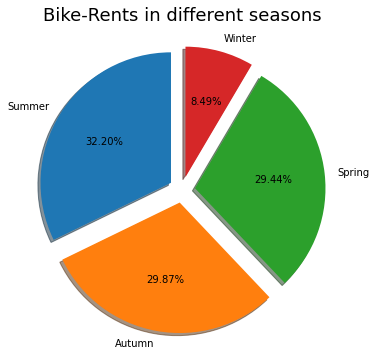

In [25]:
plt.rcParams['figure.figsize'] = (10,6)
rents = seasons_data['Rented Bike Count']
plt.pie(rents, labels = seasons_data['Seasons'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1], shadow = True )
plt.title('Bike-Rents in different seasons', {'fontsize': 18})
plt.show()

Bike rental count is highest during summers. (Ideal temperature for use of bikes).

2. Bike Rental Count Analysis: Throughout the day for all seasons




[Text(0.5, 1.0, 'Bikes Rented in different Seasons')]

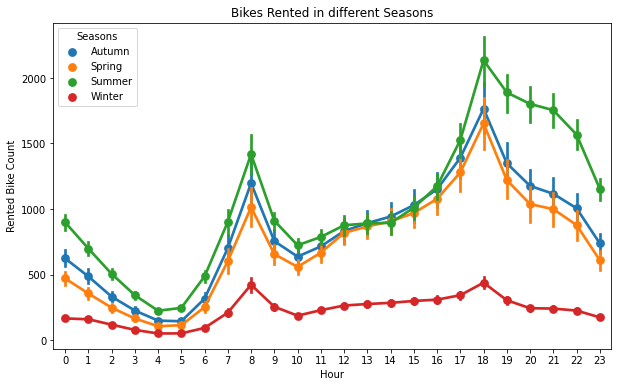

In [26]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Seasons", ax=ax)
ax.set(title="Bikes Rented in different Seasons")

Observation:

* Winter has comparatively lesser bike rents
* 8:00 am and 6:00 pm are the peak hours of bike rent in all seasons.
* Bike rents in the morning are lesser than that in the evening
* Summers have the highest bike rents.


3. Bike Rental Count Analysis: Holiday v/s No Holiday 

[Text(0.5, 1.0, 'Bikes Rented on Holidays vs No Holidays')]

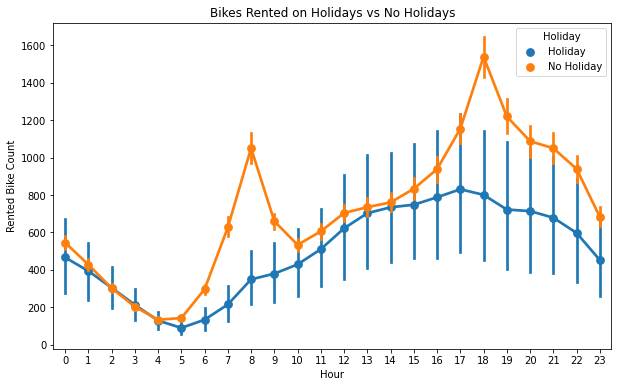

In [27]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Holiday", ax=ax)
ax.set(title="Bikes Rented on Holidays vs No Holidays")

Observation:

* On No Holidays, bike rents start around 5:00 am and are highest during peak hours.
* On Holidays the bike rents are casually increasing from 8:00 am to 5:00 pm and decrease afterrward.

4. Bike Rental Count Analysis: Functional Day v/s No Functional Day

[Text(0.5, 1.0, 'Bikes Rented on Functional Days vs No Functional Days')]

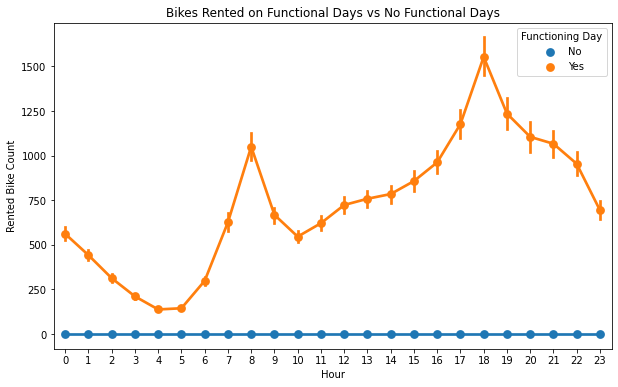

In [28]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Functioning Day", ax=ax)
ax.set(title="Bikes Rented on Functional Days vs No Functional Days")

Observation: 

* No bike-rents were observed on No Functional days.
* Bike-rents follow a regular trend on functional days.

#**Data Preparation**

**Feature Selection**

Multicolinearity Test

* VIF is always greater or equal to 1.
* If VIF = 1 => Not correlated to any of the variables.
* If 1 < VIF < 5 => Moderately correlated.
* VIF > 5 => Highly correlated.
* If there are multiple variables with VIF greater than 5, only remove one of them and find VIF again.

In [29]:
# function to calculate Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    #Calculating VIF for the column X 
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [30]:
num_cols = data._get_numeric_data().columns.to_list()
num_cols


['Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind Speed',
 'Visibility',
 'Dew point temperature',
 'Solar radiation',
 'Rainfall',
 'Snowfall',
 'year']

In [31]:
num_cols.remove('Rented Bike Count')
independent_numerical_cols= num_cols

In [32]:
independent_numerical_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Visibility',
 'Dew point temperature',
 'Solar radiation',
 'Rainfall',
 'Snowfall',
 'year']

In [33]:
calculate_vif(data[[i for i in independent_numerical_cols]])

,variables,VIF
0,Temperature,187.482103
1,Humidity,186.517131
2,Wind Speed,4.533706
3,Visibility,10.235595
4,Dew point temperature,126.711067
5,Solar radiation,2.832598
6,Rainfall,1.100442
7,Snowfall,1.125229
8,year,394.869086


In [34]:
data.drop('year',inplace=True,axis=1)


In [35]:
calculate_vif(data[[i for i in independent_numerical_cols if  i not in ['year']]])

,variables,VIF
0,Temperature,29.075866
1,Humidity,5.069743
2,Wind Speed,4.517664
3,Visibility,9.051931
4,Dew point temperature,15.201989
5,Solar radiation,2.821604
6,Rainfall,1.079919
7,Snowfall,1.118903


Observation:
* 'Temperature' cannot be dropped, because it has high correlation with the target variable- Bike rental count.
* Drop 'Dew point temperature' 

In [36]:
#drooping 'dew point temperature' since it has high VIF and also correlated with temperature.
data.drop('Dew point temperature',inplace=True,axis=1)


In [37]:
calculate_vif(data[[i for i in independent_numerical_cols if  i not in ['Dew point temperature','year']]])

,variables,VIF
0,Temperature,3.166007
1,Humidity,4.758651
2,Wind Speed,4.079926
3,Visibility,4.409448
4,Solar radiation,2.246238
5,Rainfall,1.078501
6,Snowfall,1.118901


* All the features have VIF < 5. Therefore, the above 7 features are considered for modelling.



---



---



---



In [38]:
#drop 'date' feature : 
data=data.drop(['Date'],axis=1)
data

,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month
0,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,764,20,3.4,37.0,2.3,2000.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,694,21,2.6,39.0,0.3,1968.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,712,22,2.1,41.0,1.0,1859.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


In [39]:
categorical_cols=list(set(data.columns) - set(data._get_numeric_data().columns))

In [40]:
categorical_cols

['Month', 'Functioning Day', 'Seasons', 'Hour', 'Holiday']

In [41]:
data_new = data

def one_hot_encoding(data, column):
  #Obtains the one hot encoding of the feature provided in argument and returns the dataframe with one hot encoded columns.
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_cols:
    data_new = one_hot_encoding(data_new, col)
data_new.head()

,Rented Bike Count,Temperature,Humidity,Wind Speed,Visibility,Solar radiation,Rainfall,Snowfall,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Functioning Day_No,Functioning Day_Yes,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday
0,254,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
data_new.shape

(8760, 52)

**After feature engineering, there are 51 total features and 8760 observations.**

In [43]:
df=data_new

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   float64
 3   Wind Speed           8760 non-null   float64
 4   Visibility           8760 non-null   float64
 5   Solar radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Month_1              8760 non-null   uint8  
 9   Month_2              8760 non-null   uint8  
 10  Month_3              8760 non-null   uint8  
 11  Month_4              8760 non-null   uint8  
 12  Month_5              8760 non-null   uint8  
 13  Month_6              8760 non-null   uint8  
 14  Month_7              8760 non-null   uint8  
 15  Month_8              8760 non-null   u

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

**Feature Scaling**

In [46]:
# X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented Bike Count',axis=1)
y=np.sqrt(df['Rented Bike Count'])


In [47]:
X.shape

(8760, 51)

In [48]:
X.head()

,Temperature,Humidity,Wind Speed,Visibility,Solar radiation,Rainfall,Snowfall,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Functioning Day_No,Functioning Day_Yes,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday
0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:

# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle= True)


In [50]:
cols=data._get_numeric_data().columns.to_list()
cols.remove('Rented Bike Count')
cols
#Cols is the numerical independent columns that are to be scaled.

['Temperature',
 'Humidity',
 'Wind Speed',
 'Visibility',
 'Solar radiation',
 'Rainfall',
 'Snowfall']

In [51]:
# Transforming data 

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])


min_max_scaler = MinMaxScaler()
X_train[cols] = min_max_scaler.fit_transform(X_train[cols])
X_test[cols] = min_max_scaler.transform(X_test[cols])



* Independent features are scaled using Robust Scaler 
* Robust Scaler is not sensitive to the outliers in the data 

In [52]:
X_train.head()

,Temperature,Humidity,Wind Speed,Visibility,Solar radiation,Rainfall,Snowfall,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Functioning Day_No,Functioning Day_Yes,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday
2223,0.590909,0.142857,0.297297,0.912557,0.661932,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
798,0.194056,0.489796,0.324324,0.995425,0.000000,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7752,0.508741,0.724490,0.162162,0.998475,0.000000,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
734,0.363636,0.285714,0.513514,0.977631,0.312500,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2881,0.512238,0.785714,0.270270,0.284698,0.000000,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6570, 51)
(6570,)
(2190, 51)
(2190,)


* Train dataset: 6560 observations and 51 features.
* Test dataset: 2190 observations and 51 features.

Checking the distribution of train and test dataset.

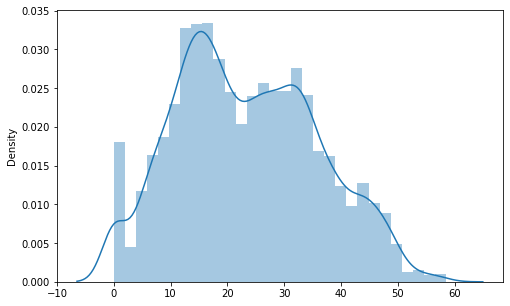

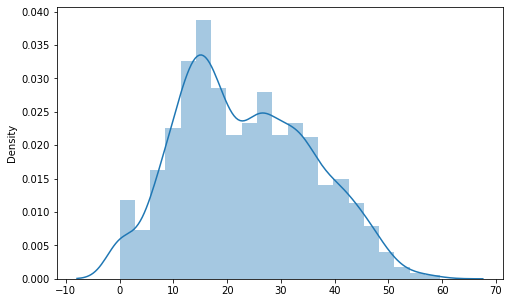

In [54]:
plt.figure(figsize=(8,5))
sns.distplot(x=y_train)
plt.figure(figsize=(8,5))
sns.distplot(x=y_test)


#**Modeling**

#**Model 1: Linear Regression** 

In [55]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

LinearRegression()

In [56]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Temperature,2.631343e+01
Humidity,-1.302871e+01
Wind Speed,-1.071869e+00
Visibility,8.212321e-01
Solar radiation,3.611367e+00
Rainfall,-4.666315e+01
Snowfall,-1.720456e-01
Month_1,-9.444196e+11
Month_2,-9.444196e+11
Month_3,-9.444196e+11


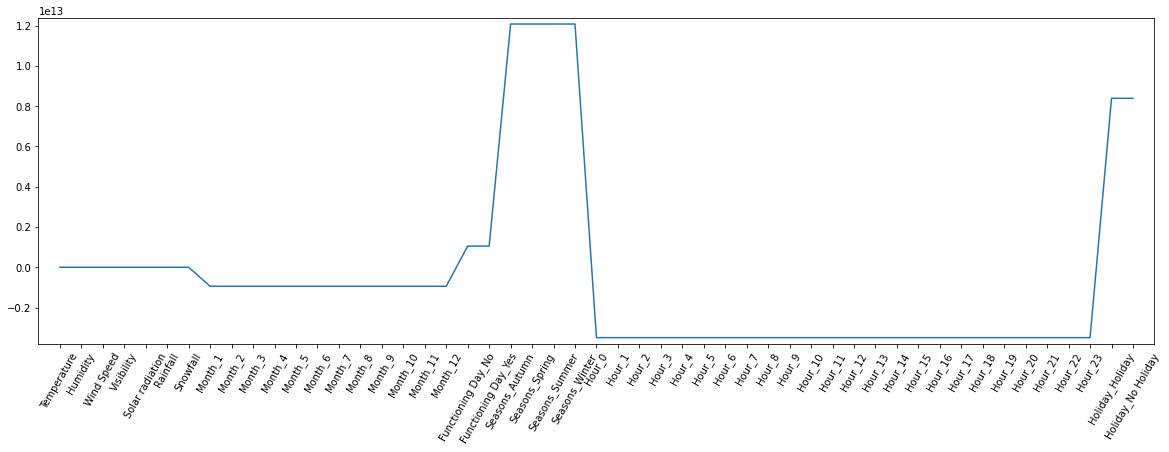

In [57]:
# Plot the regression coefficients

plt.figure(figsize=(20,6))
plt.plot(range(len(X.columns)), l_reg.coef_)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()


In [58]:
# Check intercept
l_reg.intercept_

-17075115736583.44

In [59]:
#Checking score
l_reg.score(X_train,y_train)

0.7626381441317758

In [60]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [61]:
def evaluation(model,y_actual,y_pred):
  
  #Calculate Mean Absolute Error.
  MAE= mean_absolute_error(y_actual,y_pred)
  # print(f"The Mean Absolute Error (MAE) is {MAE}.")

  #Calculate  Mean Squared Error
  MSE=mean_squared_error(y_actual,y_pred)
  # print(f"The Mean Squred Error(MSE) is {MSE}.")

  #Calculate Root Mean Squared Error
  RMSE=np.sqrt(MSE)
  # print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

  #Calculate R2 Score
  R2=r2_score(y_actual,y_pred)
  print(f"The R2 Score is {R2}.")

  var_test = y_actual.var()
  Adj_rsquare = 1-(MSE/var_test)
  # print(f"The Adjusted R2 Score is {Adj_rsquare}.")

  dictionary={'Model':model,
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2_score': round(Adj_rsquare,4)}
  # create training_result dataframe
  return pd.DataFrame(dictionary,index=[1])


Evaluation of train dataset

In [62]:
# Evaluation of training data set
evaluation("Linear regression-train",y_train,y_pred_train)

The R2 Score is 0.7626381441317758.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Linear regression-train,4.6531,37.0832,6.0896,0.7626,0.7627



Evaluation of test dataset

In [63]:
evaluation("Linear regression-test",y_test,y_pred)

The R2 Score is 0.7407737542430745.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Linear regression-test,4.6491,39.2327,6.2636,0.7408,0.7409


Observation:
* Difference in Adjusted R2 score for train and test data is less.
* No overfitting is observed.
* Model performance needs to be improvised.


In [64]:
# define a fucntion to visualize predicted y values with actual y values:
def line_plot(y_pred,y_test): 
  # plt.figure(figsize=(12,10))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual Bike Rental Count")
  plt.show()

def scatter_plot(y_pred,y_test): 
  plt.figure(figsize=(8,5))
  sns.regplot(x=y_test,y=y_pred,line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted Bike Rental Count")

def residual_plot(y_pred,y_test):

  plt.figure(figsize=(8,5))
  sns.distplot(x=y_test-y_pred)
  plt.title("Residual Density Plot")

  fig, ax = plt.subplots(figsize=(8, 5))

  residual=y_pred-y_test
  pp = sm.ProbPlot(residual, fit=True)
  qq = pp.qqplot(marker='.', markerfacecolor='k', markeredgecolor='k', alpha=0.5, ax=ax)
  sm.qqline(qq.axes[0], line='45', fmt='k--')
  plt.title("Residual Distribution")

  
def homoscedasticity_plot(y_pred,y_test):
  plt.figure(figsize=(8,5))
  sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
  plt.ylabel('Residuals')
  plt.xlabel('y_predicted')
  plt.title("Residuals vs predicted values")


Evaluation Plots 

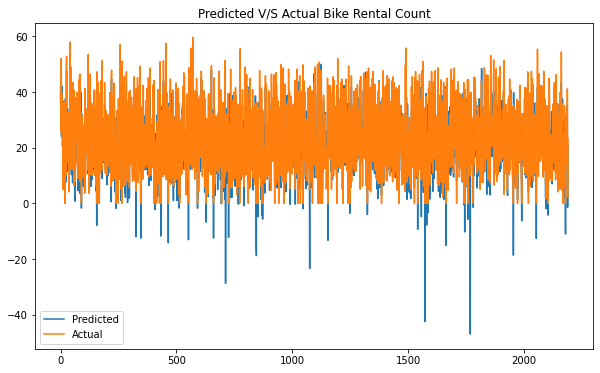

In [65]:
line_plot(y_pred,y_test)


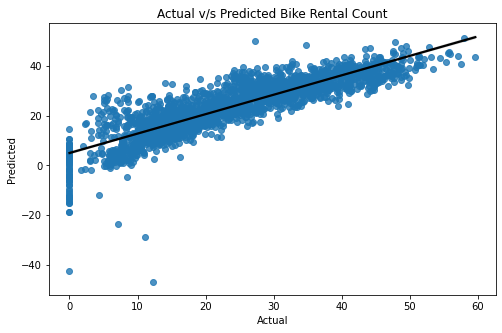

In [66]:
scatter_plot(y_pred,y_test)

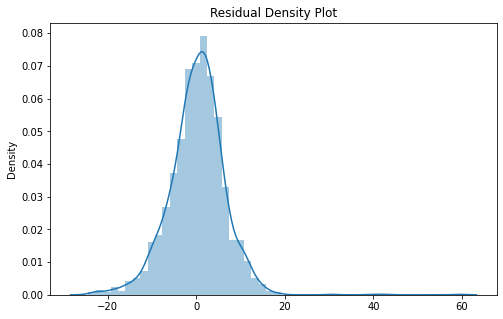

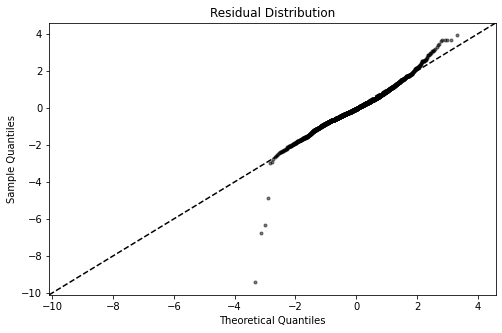

In [67]:
residual_plot(y_pred,y_test)
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
# Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 


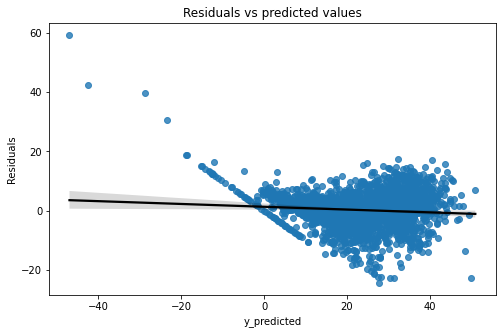

In [68]:
homoscedasticity_plot(y_pred,y_test)


#**Model 2: Regularized Regression**

* Lasso Regression (L1 Regularization)
* Ridge Regression (L2 Regularization) 
* Elastic Net Regression 

**Lasso Regression**

In [124]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_reg=Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=5)


In [70]:
lasso_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [71]:
print("Tuned Decision lasso Parameters: {}".format(lasso_grid.best_params_))
print("Best score is {}".format(lasso_grid.best_score_))

Tuned Decision lasso Parameters: {'alpha': 0.0014}
Best score is -37.79561541256909


In [72]:
best_lasso_model = lasso_grid.best_estimator_
best_lasso_model.coef_ 


array([ 2.61989803e+01, -1.31050444e+01, -9.41226757e-01,  8.07145721e-01,
        3.40561279e+00, -4.58716268e+01, -0.00000000e+00, -1.92205920e-01,
       -9.57104541e-01,  2.32169503e-03, -1.16789241e-01,  1.20582170e+00,
        3.95896161e+00, -3.17211668e-01, -8.96475031e-01, -6.55199567e-02,
        1.85979821e+00,  5.56094336e-01,  9.17179553e-01, -2.87065438e+01,
        2.32484247e-12,  3.25713248e+00,  2.65676699e-01, -0.00000000e+00,
       -3.80984535e+00,  0.00000000e+00, -1.76717868e+00, -4.79598285e+00,
       -7.22798528e+00, -9.48377093e+00, -9.18453632e+00, -4.47116654e+00,
        1.81832852e+00,  7.17905812e+00,  1.20031848e+00, -3.09146716e+00,
       -3.30220202e+00, -2.55608485e+00, -2.66254443e+00, -2.70513940e+00,
       -1.61250655e+00,  3.08449662e-01,  4.41594711e+00,  1.02908297e+01,
        7.31919583e+00,  6.79970003e+00,  6.55784389e+00,  5.39529181e+00,
        1.78359972e+00, -2.65047886e+00,  1.25806649e-13])

In [73]:
X.shape

(8760, 51)

In [74]:
# get dataframe of x columns and Coeficients
# pd.DataFrame(best_lasso_model.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})
pd.DataFrame(best_lasso_model.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Temperature,2.619898e+01
Humidity,-1.310504e+01
Wind Speed,-9.412268e-01
Visibility,8.071457e-01
Solar radiation,3.405613e+00
Rainfall,-4.587163e+01
Snowfall,-0.000000e+00
Month_1,-1.922059e-01
Month_2,-9.571045e-01
Month_3,2.321695e-03


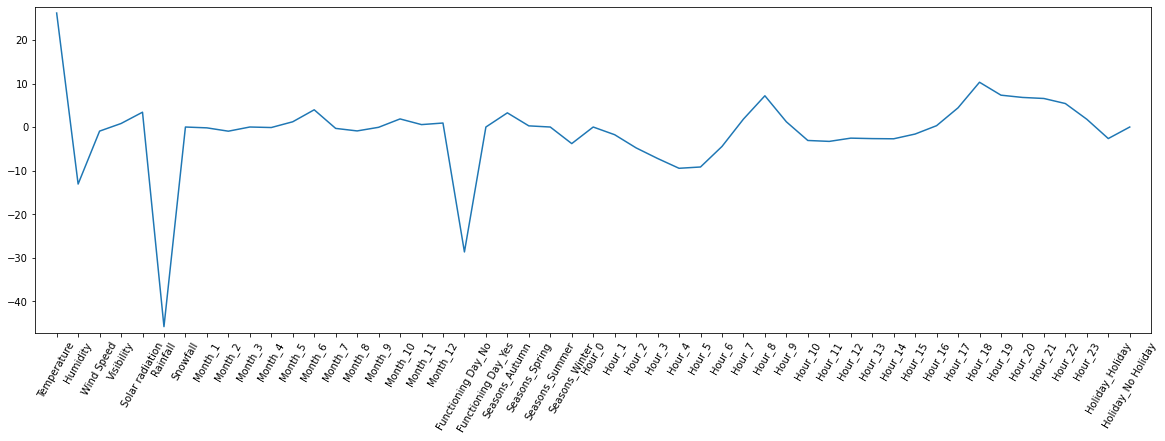

In [75]:
# Plot the regression coefficients

plt.figure(figsize=(20,6))
plt.plot(range(len(X.columns)), best_lasso_model.coef_)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()

In [76]:
# Check score on train dataset
best_lasso_model.score(X_train,y_train)

0.7626141697377047

In [77]:
# Check score on test dataset
best_lasso_model.score(X_test,y_test)

0.7416078589734163

In [78]:
# Check intercept
best_lasso_model.intercept_

17.155189684369144

In [ ]:
# y prdiction on train data
y_pred_train_lasso=best_lasso_model.predict(X_train)
# y prdiction on test data
y_pred_lasso=best_lasso_model.predict(X_test)

Evaluation On Train Dataset.

In [ ]:
evaluation("Lasso regression-train",y_train,y_pred_train_lasso)

The R2 Score is 0.7617466322861153.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Lasso regression-train,4.6128,36.6147,6.051,0.7617,0.7618


Evaluation On Test Dataset.

In [ ]:
evaluation("Lasso regression-test",y_test,y_pred_lasso)

The R2 Score is 0.7470766165531169.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Lasso regression-test,4.7756,40.1856,6.3392,0.7471,0.7472


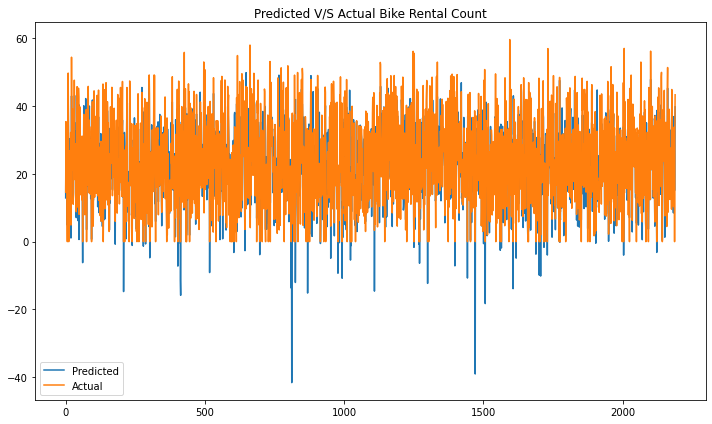

In [ ]:
line_plot(y_pred_lasso,y_test)

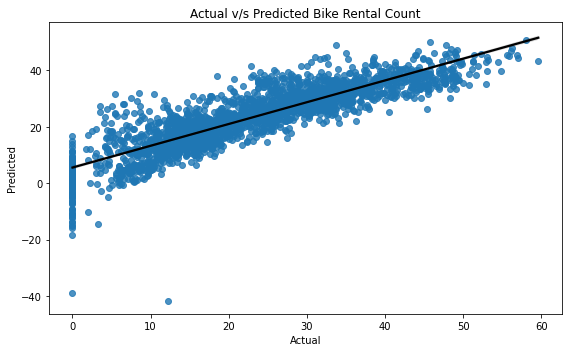

In [ ]:
scatter_plot(y_pred_lasso,y_test)

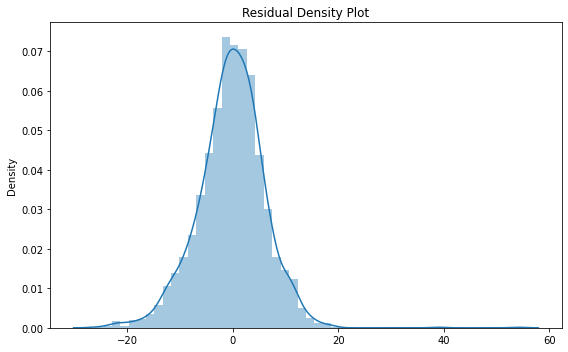

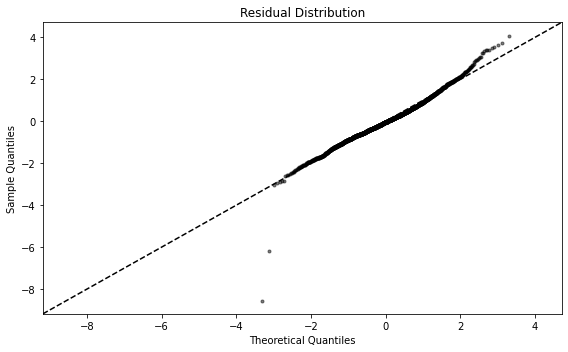

In [ ]:
residual_plot(y_pred_lasso,y_test)

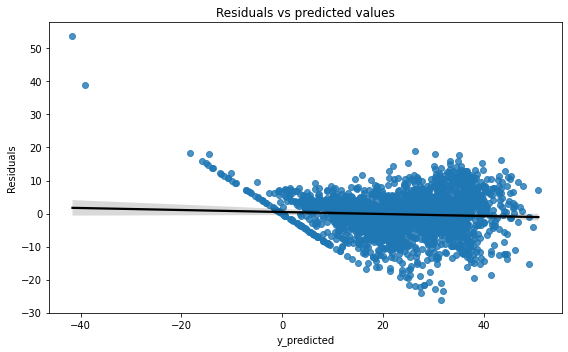

In [ ]:
homoscedasticity_plot(y_pred_lasso,y_test)

**Ridge Regression**

In [ ]:
# instantiating
ridge_lg=Ridge()


In [ ]:
# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge_lg, parameters, scoring='neg_mean_squared_error', cv=3)

In [ ]:
# fitting and training
ridge_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   60, 100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [ ]:
best_ridge_model = ridge_grid.best_estimator_
best_ridge_model.coef_ 


array([ 27.17135931, -13.43755454,  -1.19608759,   0.83499329,
         3.66619507, -53.40489862,   1.01711162, -38.13425602,
       -35.42792506,  -0.42230993,  -2.83892633,  -5.37004102,
        -7.97203826,  -9.5937934 , -10.06053497,  -5.00514097,
         1.48285955,   7.02858935,   0.53197908,  -4.11787081,
        -4.12267628,  -3.46494153,  -3.8633675 ,  -3.89861026,
        -2.39764   ,  -0.47842124,   3.4670914 ,   9.40133481,
         6.79826697,   5.90684975,   5.82561543,   4.82051508,
         1.14111543,  -6.6271756 ,  -7.28116081,  -6.28131589,
        -6.17733669,  -5.10677918,  -2.5560272 ,  -6.62496369,
        -7.28850535,  -6.61124025,  -5.04182414,  -5.80198495,
        -5.48533911, -14.52171629,  13.69068613, -73.28086657,
       -76.27621031, -76.72972009, -80.22317762])

In [ ]:
print("Tuned Decision lasso Parameters: {}".format(ridge_grid.best_params_))
print("Best score is {}".format(ridge_grid.best_score_))

Tuned Decision lasso Parameters: {'alpha': 1e-15}
Best score is -37.24321161443939


In [ ]:
# get dataframe for x columns and coeff
pd.DataFrame(best_ridge_model.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Temperature,27.171359
Humidity,-13.437555
Wind Speed,-1.196088
Visibility,0.834993
Solar radiation,3.666195
Rainfall,-53.404899
Snowfall,1.017112
Holiday_Holiday,-38.134256
Holiday_No Holiday,-35.427925
Hour_0,-0.422310


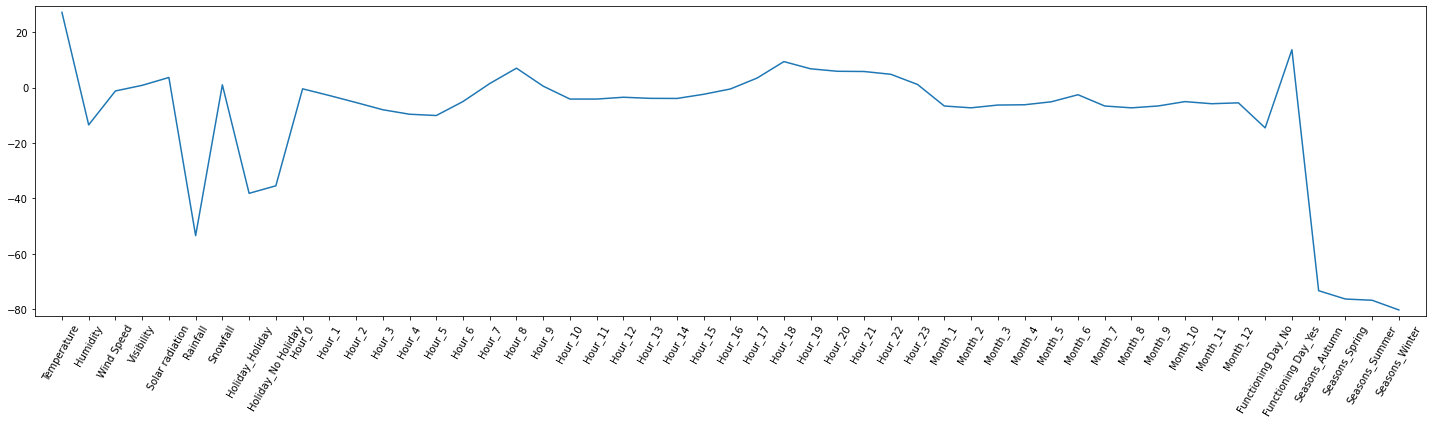

In [ ]:
# Plot the regression coefficients

plt.figure(figsize=(20,6))
plt.plot(range(len(X.columns)), best_ridge_model.coef_)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()

In [ ]:
# Check intercept
best_ridge_model.intercept_

122.32452971147863

In [ ]:
# y predictions on training dataset
y_pred_train_ridge=best_ridge_model.predict(X_train)
# y predictions on test dataset
y_pred_ridge=best_ridge_model.predict(X_test)

Evaluation On Train Dataset.

In [ ]:
evaluation("Ridge regression-train",y_train,y_pred_train_ridge)

The R2 Score is 0.7617637460066217.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Ridge regression-train,4.6122,36.6121,6.0508,0.7618,0.7618



Evaluation On Test Dataset.

In [ ]:
evaluation("Ridge regression-test",y_test,y_pred_ridge)

The R2 Score is 0.7466048807597394.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Ridge regression-test,4.7773,40.2605,6.3451,0.7466,0.7467


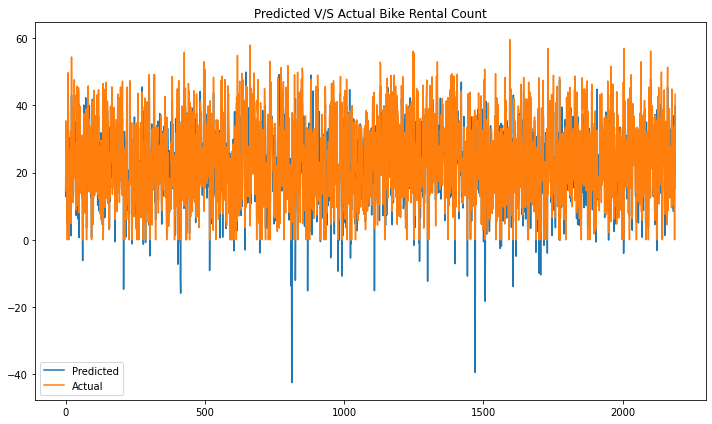

In [ ]:
line_plot(y_pred_ridge,y_test)

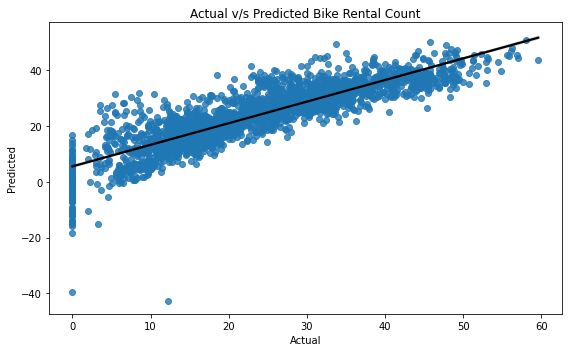

In [ ]:
scatter_plot(y_pred_ridge,y_test)

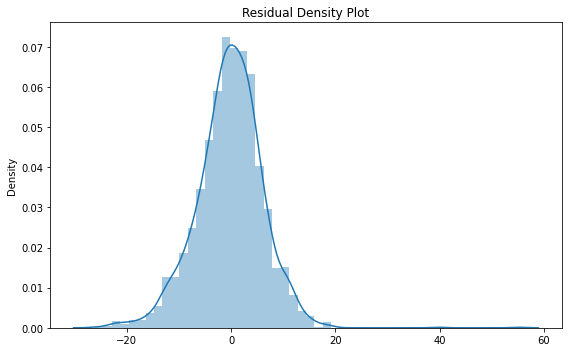

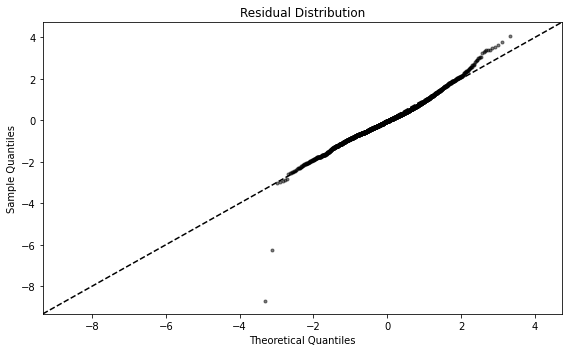

In [ ]:
residual_plot(y_pred_ridge,y_test)

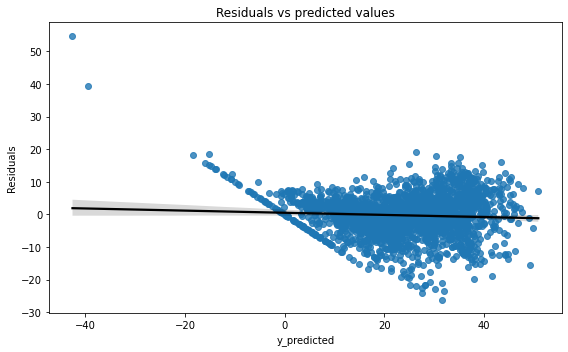

In [ ]:
homoscedasticity_plot(y_pred_ridge,y_test)

**ElasticNet**

In [ ]:
# Cross validation
elastic_regressor= ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_grid = GridSearchCV(elastic_regressor, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
# print best parameters and best score
print(f'The best alpha value is {elastic_grid.best_params_}')
print(f'The best negative mean squred error value is {elastic_grid.best_score_}')


The best alpha value is {'alpha': 0.0001, 'l1_ratio': 0.4}
The best negative mean squred error value is -37.23066455796037


In [ ]:
# Check score on Train dataset
elastic_grid.score(X_train,y_train)

-36.620394450462065

In [ ]:
# check score on Test dataset.
elastic_grid.score(X_test,y_test)

-40.073460196725414

In [ ]:
#  predicting y_train_predictions from  X train values
y_pred_train_elastic_grid=elastic_grid.predict(X_train)
#  predicting y_predictions from  X test values
y_pred_elastic_grid=elastic_grid.predict(X_test)

In [ ]:
evaluation("Elastic Net Regression GridSearch CV-train",y_train,y_pred_train_elastic_grid)

The R2 Score is 0.7617095572672611.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Elastic Net Regression GridSearch CV-train,4.6164,36.6204,6.0515,0.7617,0.7617


In [ ]:
evaluation("Elastic Net Regression GridSearch CV-test",y_test,y_pred_elastic_grid)

The R2 Score is 0.7477822297257526.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Elastic Net Regression GridSearch CV-test,4.7763,40.0735,6.3304,0.7478,0.7479


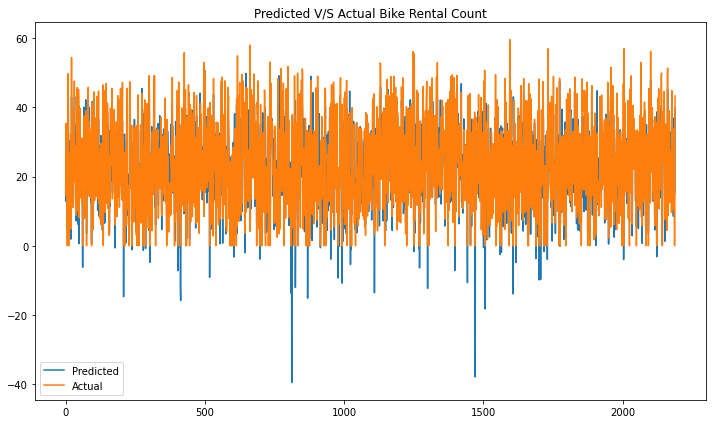

In [ ]:
line_plot(y_pred_elastic_grid,y_test)

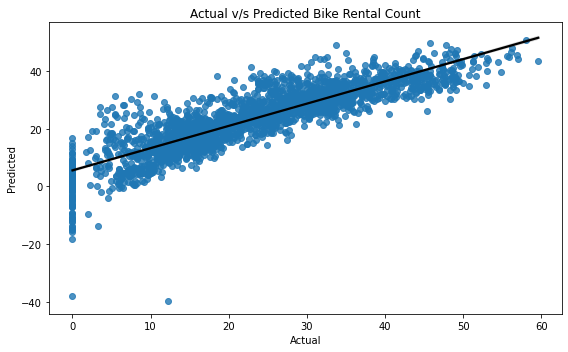

In [ ]:
scatter_plot(y_pred_elastic_grid,y_test)

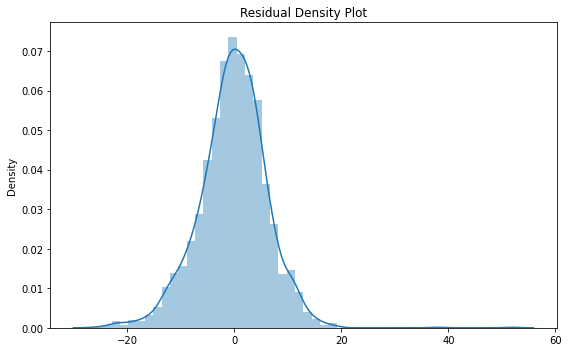

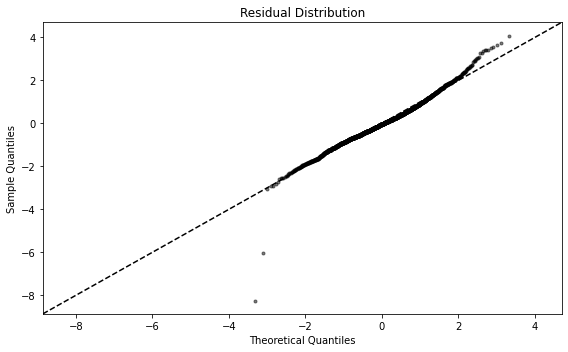

In [ ]:
residual_plot(y_pred_elastic_grid,y_test)

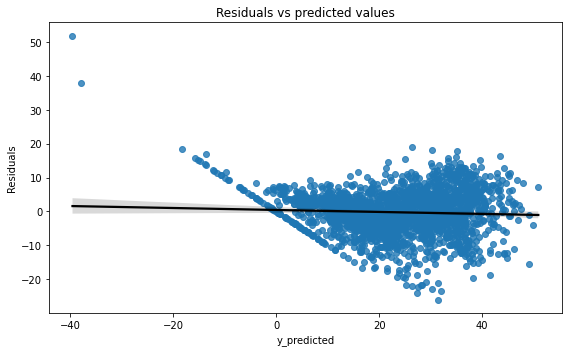

In [ ]:
homoscedasticity_plot(y_pred_elastic_grid,y_test)

#**Model 3: Decision Tree Regressor**

In [130]:
#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor
# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')
# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [ ]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

0.8000540285592799

In [ ]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

0.7537657787310643

In [ ]:
#  predicting y_train_predictions from  X train values
y_pred_train_decision=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred_decision=D_tree.predict(X_test)

Evaluation on Train Dataset

In [ ]:
evaluation("Decision Tree regression-train",y_train,y_pred_train_decision)

The R2 Score is 0.8000540285592799.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Decision Tree regression-train,4.0083,30.7276,5.5433,0.8001,0.8001


Evaluation on Test Dataset

In [ ]:
evaluation("Decision Tree regression-test",y_test,y_pred_decision)

The R2 Score is 0.7537657787310643.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Decision Tree regression-test,4.499,39.1228,6.2548,0.7538,0.7539


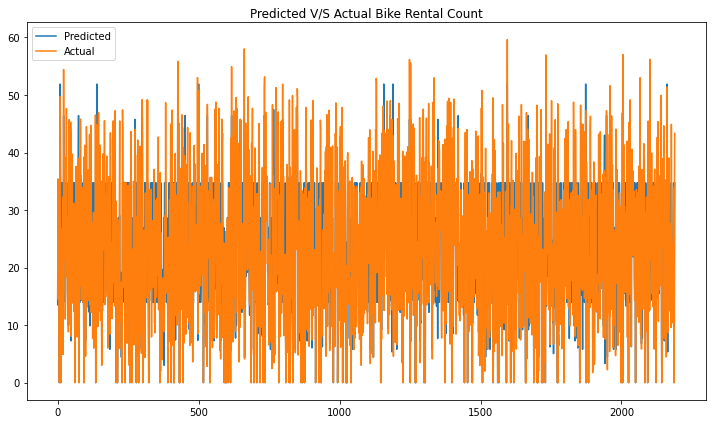

In [ ]:
line_plot(y_pred_decision,y_test)

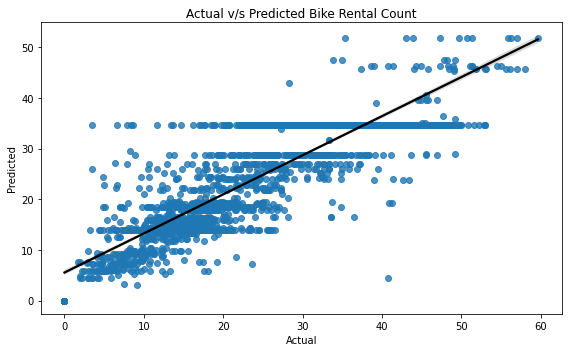

In [ ]:
scatter_plot(y_pred_decision,y_test)

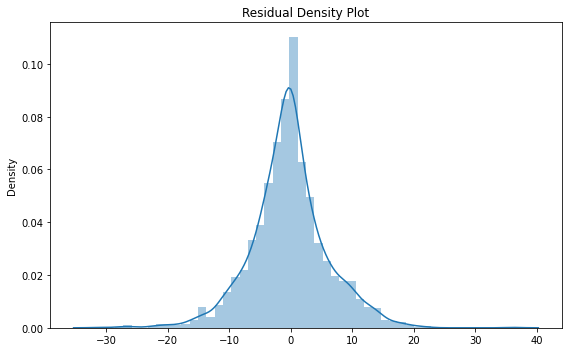

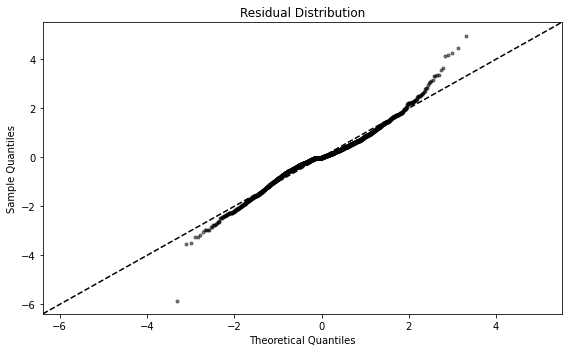

In [ ]:
residual_plot(y_pred_decision,y_test)

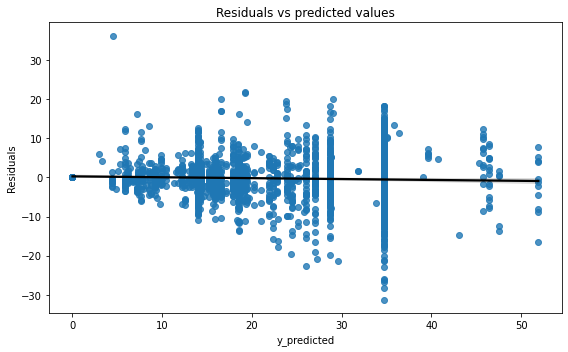

In [ ]:
homoscedasticity_plot(y_pred_decision,y_test)

**Decision Tree Regressor: Hyperparameter Tuning**

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 14, 'min_samples_split': 14}
Best score is 0.8071329521444308


In [131]:
tree = DecisionTreeRegressor(max_depth= 14, min_samples_split=14)
tree.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=14, min_samples_split=14)

In [ ]:
tree.score(X_train,y_train)

0.8873713723224761

In [ ]:
tree.score(X_test,y_test)

0.8110524385806785

In [ ]:
#  predicting y_train_predictions from  X train values
y_pred_train_decision_grid=tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred_decision_grid=tree.predict(X_test)

In [ ]:
# # Hyper parameters range intialization for tuning 
# tree=DecisionTreeRegressor()
# parameters={'criterion': ["mae"],"splitter":["best","random"],"max_depth" : [3,5,6,7,8,9,10],"max_features":["auto","log2"] }

In [ ]:
# tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=7,verbose=0)
# tuning_model.fit(X_train,y_train)

In [ ]:
# tuning_model.best_params_

In [ ]:
# #Fit the decision tree model with the best parameters chosen by hyperparameter tuning.
# D_tree_grid=DecisionTreeRegressoar(max_depth=10,max_features='auto',splitter='best')
# D_tree_grid.fit(X_train,y_train)

In [ ]:
# # Check score on Train dataset
# D_tree_grid.score(X_train,y_train)

In [ ]:
# # check score on Test dataset.
# D_tree_grid.score(X_test,y_test)

In [ ]:
# #  predicting y_train_predictions from  X train values
# y_pred_train_decision_grid=D_tree_grid.predict(X_train)
# #  predicting y_predictions from  X test values
# y_pred_decision_grid=D_tree_grid.predict(X_test)

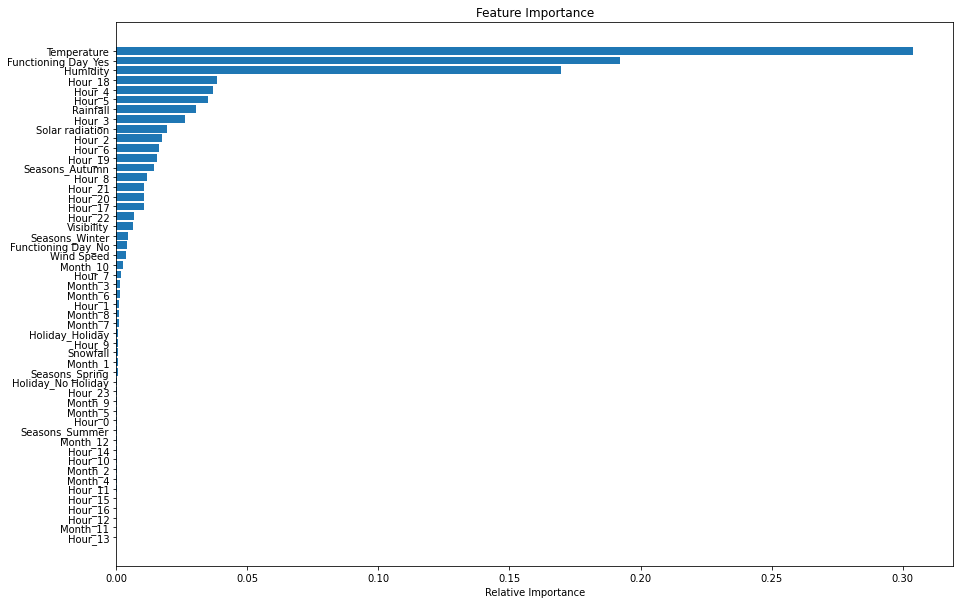

In [132]:
get_features_importance(tree,X_train)

Evaluation on Train Dataset

In [ ]:
evaluation("Decision Tree GridSearchCV-train",y_train,y_pred_train_decision_grid)

The R2 Score is 0.8873713723224761.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Decision Tree GridSearchCV-train,2.868,17.3087,4.1604,0.8874,0.8874


Evaluation on Test Dataset

In [ ]:
evaluation("Decision Tree GridSearchCV-test",y_test,y_pred_decision_grid)

The R2 Score is 0.8110524385806785.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Decision Tree GridSearchCV-test,3.7564,30.0208,5.4791,0.8111,0.8111


Evaluation Plots

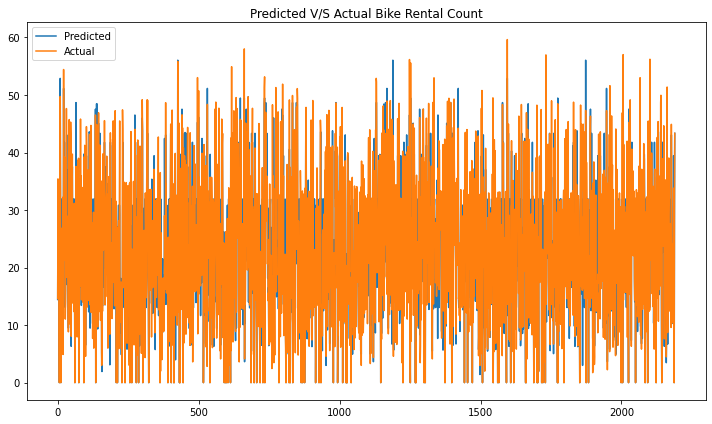

In [ ]:
line_plot(y_pred_decision_grid,y_test)

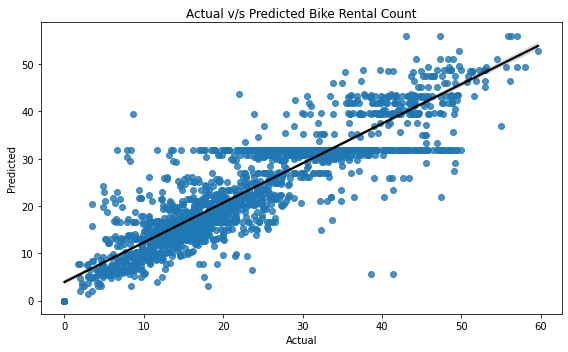

In [ ]:
scatter_plot(y_pred_decision_grid,y_test)

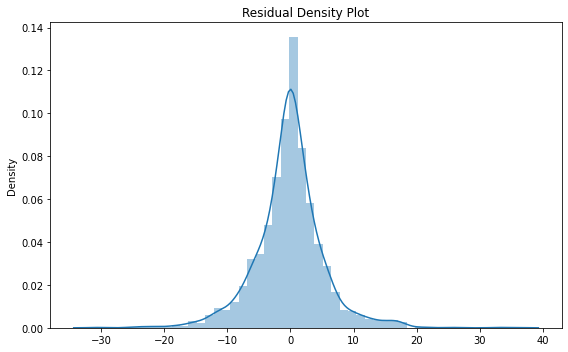

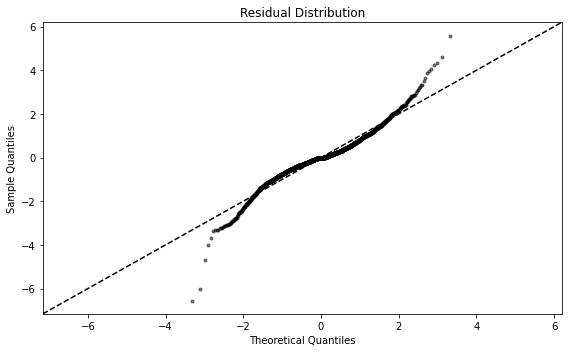

In [ ]:
residual_plot(y_pred_decision_grid,y_test)

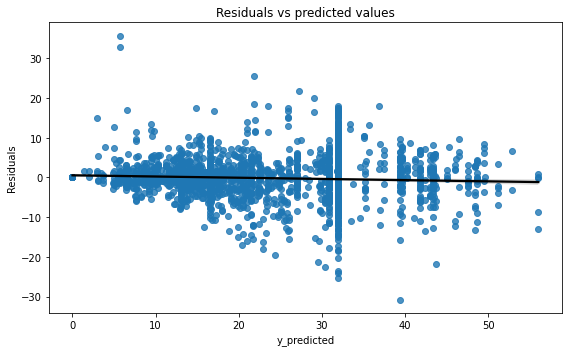

In [ ]:
homoscedasticity_plot(y_pred_decision_grid,y_test)

# **Model 4: Random Forest Regressor**

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf.score(X_train,y_train)

0.985084983907576

In [ ]:
rf.score(X_test,y_test)

0.8916222492723062

In [ ]:
y_pred_train_rf=rf.predict(X_train)
y_pred_rf=rf.predict(X_test)

Evaluation on Train Dataset

In [ ]:
evaluation("Random Forest-train",y_train,y_pred_train_rf)

The R2 Score is 0.985084983907576.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Random Forest-train,1.0049,2.2921,1.514,0.9851,0.9851


Evaluation on Test Dataset

In [ ]:
evaluation("Random Forest-test",y_test,y_pred_rf)

The R2 Score is 0.8916222492723062.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Random Forest-test,2.8095,17.2195,4.1496,0.8916,0.8917


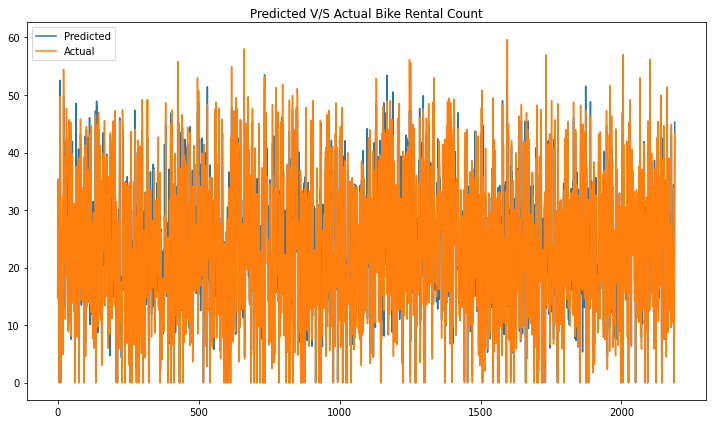

In [ ]:
line_plot(y_pred_rf,y_test)

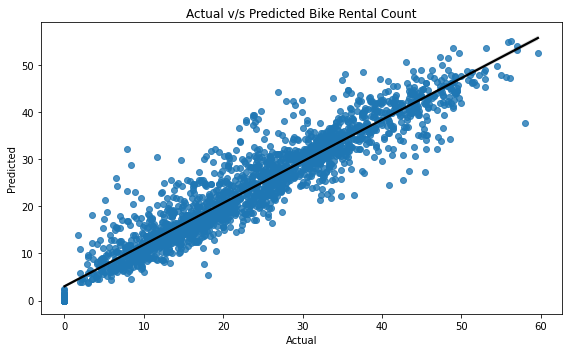

In [ ]:
scatter_plot(y_pred_rf,y_test)

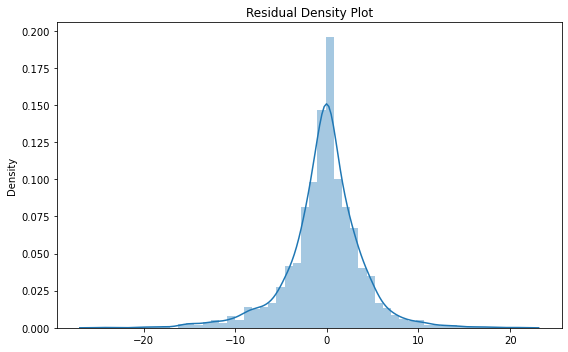

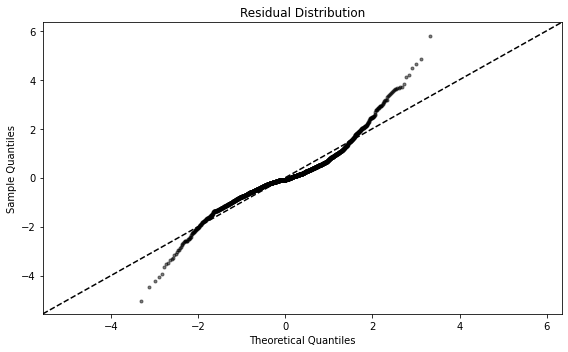

In [ ]:
residual_plot(y_pred_rf,y_test)

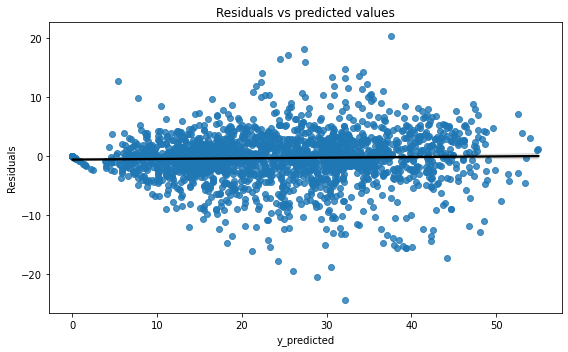

In [ ]:
homoscedasticity_plot(y_pred_rf,y_test)

**Random Forest Regressor: Hyperparameter Tuning**



In [126]:
# Create the random grid
random_grid = {'n_estimators': range(100,700,100),
               'max_depth': range(8,20,1),
               'min_samples_split':range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()



In [ ]:
# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = GridSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

In [127]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(max_depth= 19, min_samples_split=4,n_estimators=600)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=19, min_samples_split=4, n_estimators=600)

In [ ]:
y_pred_train_rf_grid=Forest.predict(X_train)
y_pred_rf_grid=Forest.predict(X_test)

In [ ]:
# # param={'n_estimators':[15,25,50,40,80,100,150,200],'max_depth':[3,4,5,6,7,8,9,10,20,25,30]}
# # param={'n_estimators':[1,5,10,15,20,400],'max_depth':[5,10,15,20,30,40]}
# param={'n_estimators':[100,200,300,400,500],'max_depth':[5,6,9,10,12]}

In [ ]:

# rf_reg=RandomForestRegressor()
# rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
# rf_tuning.fit(X_train,y_train)



In [ ]:
# rf_tuning.best_params_

In [ ]:
# rf_grid=RandomForestRegressor(max_depth=12,n_estimators=500)
# rf_grid.fit(X_train,y_train)

In [ ]:

# rf_grid.score(X_train,y_train)

In [ ]:

# rf_grid.score(X_test,y_test)

In [ ]:
# y_pred_train_rf_grid=rf_grid.predict(X_train)
# y_pred_rf_grid=rf_grid.predict(X_test)

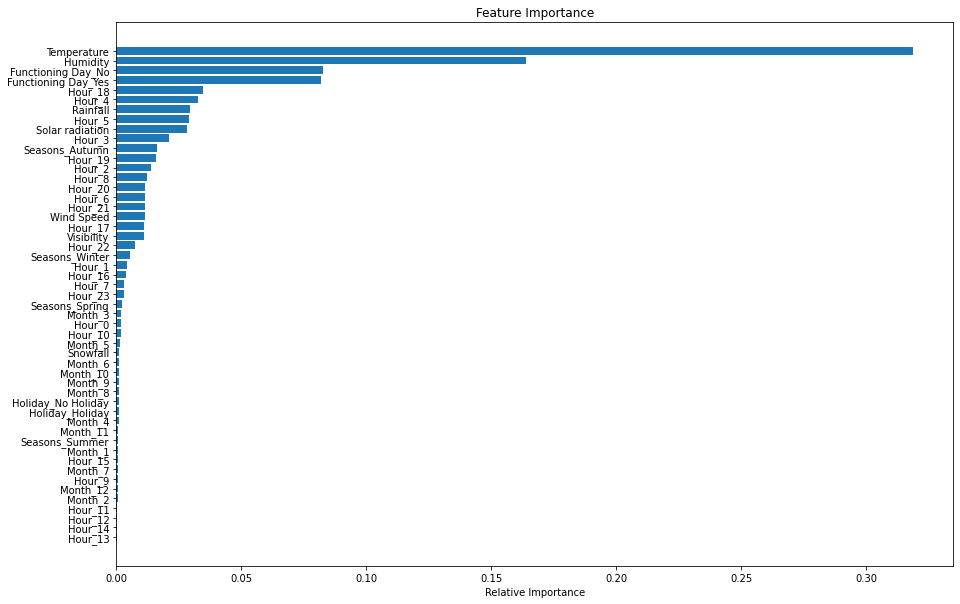

In [128]:
get_features_importance(Forest,X_train)

Evaluation on Train Dataset

In [ ]:
evaluation("Random Forest GridSearchCV-train",y_train,y_pred_train_rf_grid)

The R2 Score is 0.9573657124446924.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Random Forest GridSearchCV-train,1.6627,6.552,2.5597,0.9574,0.9574


Evaluation on Test Dataset

In [ ]:
evaluation("Random Forest GridSearchCV-test",y_test,y_pred_rf_grid)

The R2 Score is 0.8857711069934661.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Random Forest GridSearchCV-test,2.9142,18.1492,4.2602,0.8858,0.8858


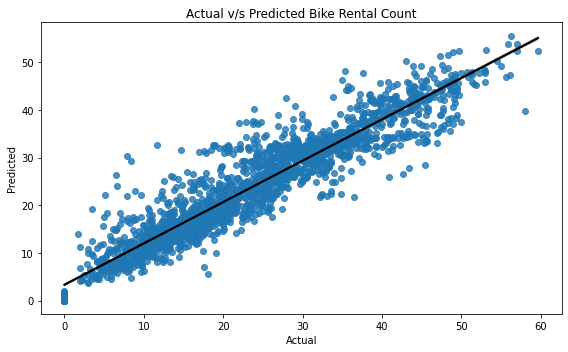

In [ ]:
scatter_plot(y_pred_rf_grid,y_test)

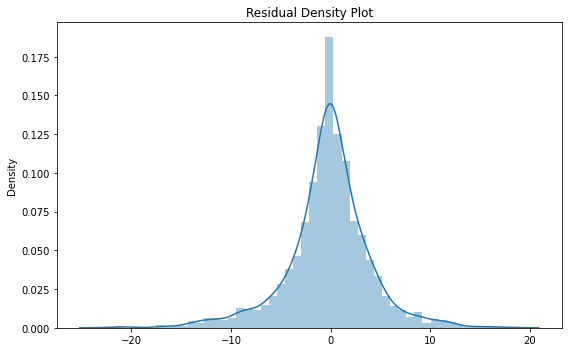

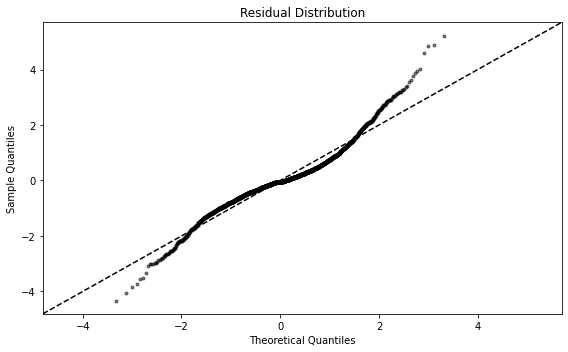

In [ ]:
residual_plot(y_pred_rf_grid,y_test)

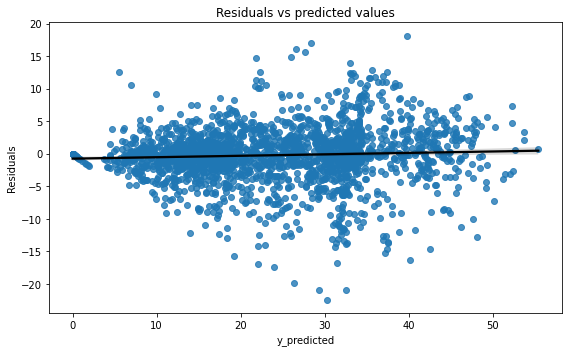

In [ ]:
homoscedasticity_plot(y_pred_rf_grid,y_test)

# **Model 5: Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradboost_reg=GradientBoostingRegressor()
gradboost_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
gradboost_reg.score(X_train,y_train)

0.8651781705095988

In [ ]:
gradboost_reg.score(X_test,y_test)

0.8427890619437448

In [ ]:
y_pred_train_gb=gradboost_reg.predict(X_train)
y_pred_gb=gradboost_reg.predict(X_test)

Evaluation on Train Dataset

In [ ]:
evaluation("Gradient Boosting-train",y_train,y_pred_train_gb)

The R2 Score is 0.8651781705095988.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Gradient Boosting-train,3.4276,20.7194,4.5519,0.8652,0.8652


Evaluation on Test Dataset

In [ ]:
evaluation("Gradient Boosting-test",y_test,y_pred_gb)

The R2 Score is 0.8427890619437448.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Gradient Boosting-test,3.7269,24.9784,4.9978,0.8428,0.8429


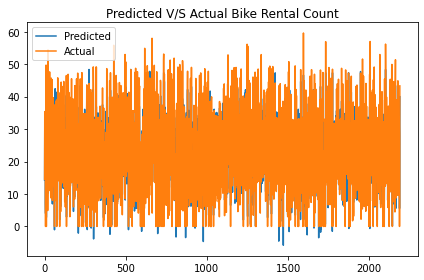

In [ ]:
line_plot(y_pred_gb,y_test)

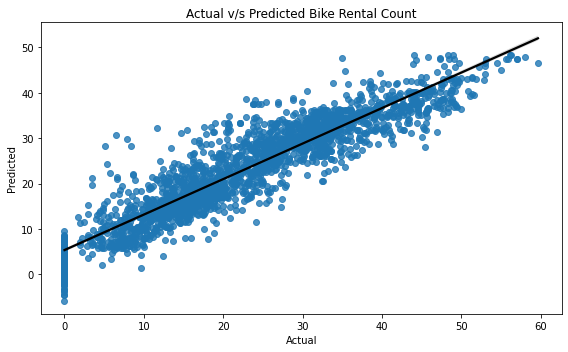

In [ ]:
scatter_plot(y_pred_gb,y_test)

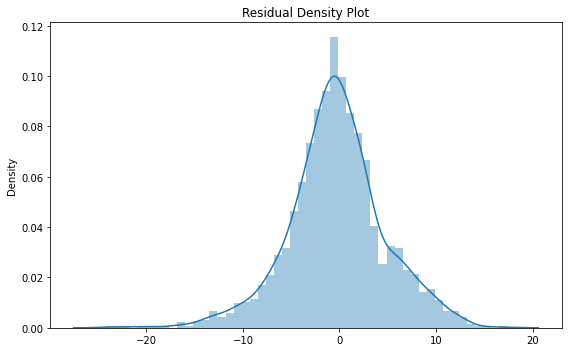

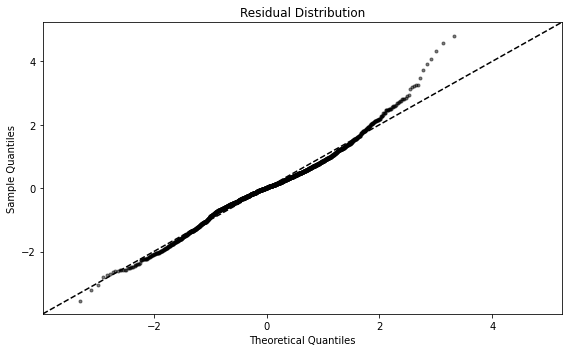

In [ ]:
residual_plot(y_pred_gb,y_test)

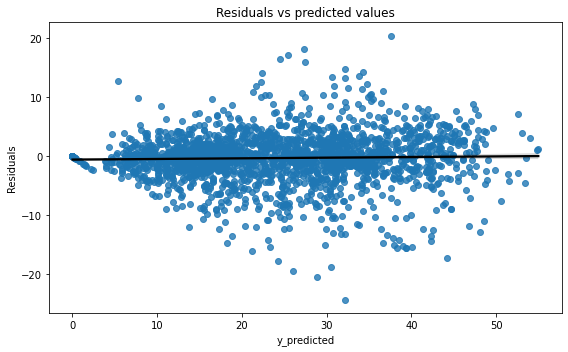

In [ ]:
homoscedasticity_plot(y_pred_rf,y_test)

**Gradient Boosting Regressor: Hyperparameter Tuning** 

In [79]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()
# creating param dict to check diffirent value of parameter
n_estimators=[70,80,100,150,200,250]
max_depth=[7,8,9,10,12,15]

params = {'n_estimators':n_estimators,'max_depth':max_depth }
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)
#calling run_model to train,fit and evalution of gradient boosting model


In [82]:
gb_grid.fit(X_train,y_train)


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [7, 8, 9, 10, 12, 15],
                         'n_estimators': [70, 80, 100, 150, 200, 250]})

In [83]:
gb_grid.best_params_

{'max_depth': 8, 'n_estimators': 150}

In [84]:
gradboo_grid=GradientBoostingRegressor(learning_rate=0.03,max_depth=8,n_estimators=150)
gradboo_grid.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=8, n_estimators=150)

In [85]:
# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train_gb_grid=gradboo_grid.predict(X_train)
# y predictions on test data
y_pred_gb_grid=gradboo_grid.predict(X_test)

In [ ]:
gb_grid=GradientBoostingRegressor()

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.08],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1,0.8],
                  'n_estimators' : [50,80,100,150,200],
                  'max_depth'    : [4,6,8,10,20]
                 }              
# 1)n_estimators : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
# 2)learning_rate:Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
# 3)max_depth : Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; 
#the best value depends on the interaction of the input variables.

#4)subsample, default=1.0
#The fraction of samples to be used for fitting the individual base learners. 
#If smaller than 1.0 this results in Stochastic Gradient Boosting. 
#subsample interacts with the parameter n_estimators. 
#Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

In [ ]:
#Gridsearch
gb_grad_tuning=GridSearchCV(gb_grid,param_grid=parameters,cv=5,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
gb_grad_tuning.fit(X_train,y_train)


In [ ]:
# get best paramters to use
gb_grad_tuning.best_params_

In [ ]:
  # USing best paramters tunned by GridsearchCv 
gradboosting_grid=GradientBoostingRegressor(learning_rate=0.03,max_depth=20,n_estimators=150,subsample=0.2)
gradboosting_grid.fit(X_train,y_train)

In [ ]:
  # checking score on train data
gradboosting_grid.score(X_train,y_train)


In [ ]:
#checking score on test data
gradboosting_grid.score(X_test,y_test)

In [ ]:
# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train_gb_grid=gradboosting_grid.predict(X_train)
# y predictions on test data
y_pred_gb_grid=gradboosting_grid.predict(X_test)

Evaluation on Train Dataset

In [86]:
evaluation("Graddient Boosting GridSearchCV-train",y_train,y_pred_train_gb_grid)

The R2 Score is 0.9425266926998046.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Graddient Boosting GridSearchCV-train,2.1892,8.9791,2.9965,0.9425,0.9425


Evaluation on Test Dataset

In [87]:
evaluation("Graddient Boosting GridSearchCV-test",y_test,y_pred_gb_grid)

The R2 Score is 0.8873498637237496.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Graddient Boosting GridSearchCV-test,2.8899,17.0491,4.1291,0.8873,0.8874


In [ ]:
line_plot(y_pred_gb_grid,y_test)

In [ ]:
scatter_plot(y_pred_gb_grid,y_test)

In [ ]:
residual_plot(y_pred_gb_grid,y_test)

In [ ]:
homoscedasticity_plot(y_pred_gb_grid,y_test)

In [ ]:
df_results_train = pd.concat([evaluation("Linear Regression-train",y_train,y_pred_train),evaluation("Lasso Regression GridSearchCV-train",y_train,y_pred_train_lasso),evaluation("Ridge Regression GridSearchCV-train",y_train,y_pred_train_ridge),evaluation("Elastic-Net GridSearchCV-train",y_train,y_pred_train_elastic_grid),evaluation("Decision Tree-train",y_train,y_pred_train_decision),evaluation("Decision Tree GridSearchCV-train",y_train,y_pred_train_decision_grid),evaluation("Random Forest-train",y_train,y_pred_train_rf),evaluation("Random Forest GridSearchCV-train",y_train,y_pred_train_rf_grid),evaluation("Graddient Boosting-train",y_train,y_pred_train_gb)])


In [ ]:
df_results_train

In [ ]:
df_results_test = pd.concat([evaluation("Linear Regression-test",y_test,y_pred),evaluation("Lasso Regression GridSearchCV-test",y_test,y_pred_lasso),evaluation("Ridge Regression GridSearchCV-test",y_test,y_pred_ridge),evaluation("Elastic-Net GridSearchCV-test",y_test,y_pred_elastic_grid),evaluation("Decision Tree-test",y_test,y_pred_decision),evaluation("Decision Tree GridSearchCV-test",y_test,y_pred_decision_grid),evaluation("Random Forest-test",y_test,y_pred_rf),evaluation("Random Forest GridSearchCV-test",y_test,y_pred_rf_grid),evaluation("Graddient Boosting-test",y_test,y_pred_gb)])


In [ ]:
df_results_test

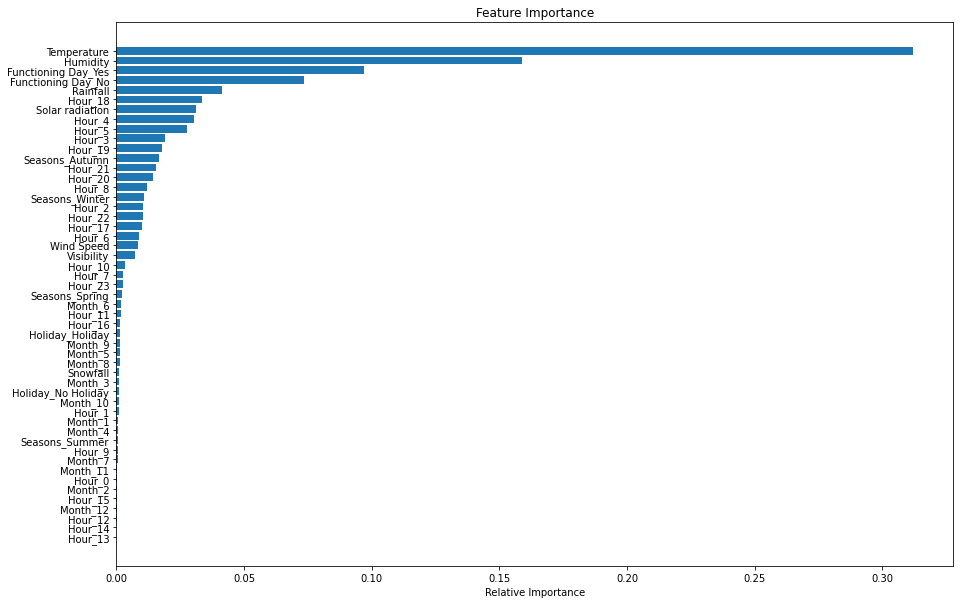

In [120]:
get_features_importance(gradboo_grid,X_train)

In [88]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 14.0 MB/s 
     |████████████████████████████████| 133 kB 94.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=8f16f248c3b1dfd0553b9529a3c47ffae4f9ff01254ed66407e9ef04172eb4a8
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inc

In [90]:
import eli5 as eli

In [91]:
feature_names=list(X_test.columns)

In [93]:
for_instance=2
#eli5 for xgboost model 
eli.show_prediction(gb_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

In [94]:
import lightgbm as lgb
lgbr=lgb.LGBMRegressor()
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)
#calling run_model to train,fit and evalution of catboost model


In [95]:
lgbr_grid.fit(X_train,y_train)
    
    


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 13],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=5)

In [97]:
# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train_lgbr_grid=lgbr_grid.predict(X_train)
# y predictions on test data
y_pred_lgbr_grid=lgbr_grid.predict(X_test)

In [98]:
evaluation("Graddient Boosting GridSearchCV-train",y_train,y_pred_train_lgbr_grid)

The R2 Score is 0.9614792073551092.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Graddient Boosting GridSearchCV-train,1.7488,6.0181,2.4532,0.9615,0.9615


In [99]:
evaluation("Graddient Boosting GridSearchCV-test",y_test,y_pred_lgbr_grid)

The R2 Score is 0.8995038604012013.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Graddient Boosting GridSearchCV-test,2.6465,15.2096,3.9,0.8995,0.8995


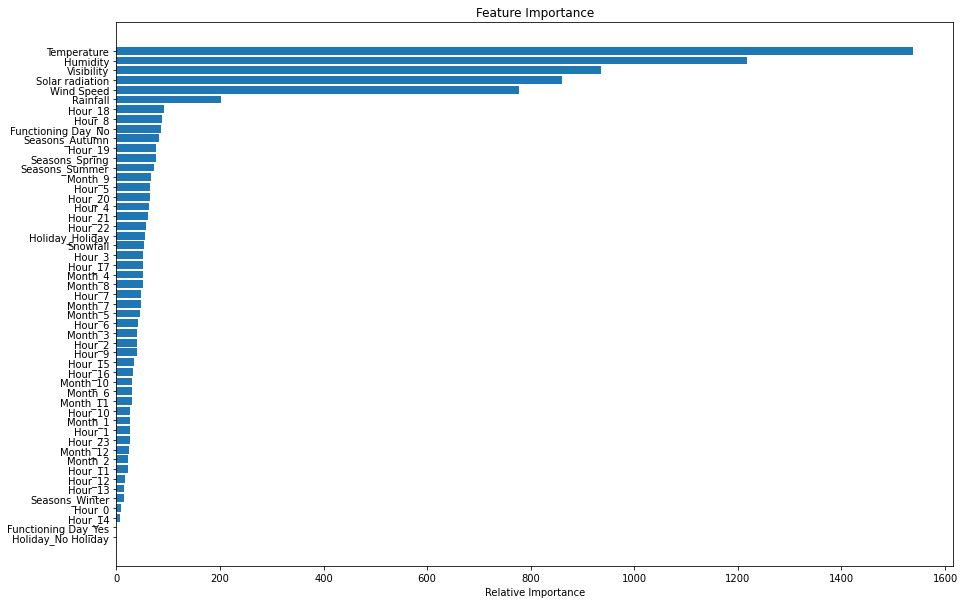

In [118]:
get_features_importance(lgbr_grid.best_estimator_,X_train)

In [100]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [101]:
from catboost import CatBoostRegressor
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)

In [102]:
cb_model.fit(X_train,y_train)


In [103]:
# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train_cb=cb_model.predict(X_train)
# y predictions on test data
y_pred_cb=cb_model.predict(X_test)

In [105]:
evaluation("Graddient Boosting GridSearchCV-train",y_train,y_pred_train_cb)

The R2 Score is 0.9515615422945108.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Graddient Boosting GridSearchCV-train,2.0088,7.5676,2.7509,0.9516,0.9516


In [106]:
evaluation("Graddient Boosting GridSearchCV-test",y_test,y_pred_cb)

The R2 Score is 0.9018947332458965.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Graddient Boosting GridSearchCV-test,2.6513,14.8478,3.8533,0.9019,0.9019


In [115]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

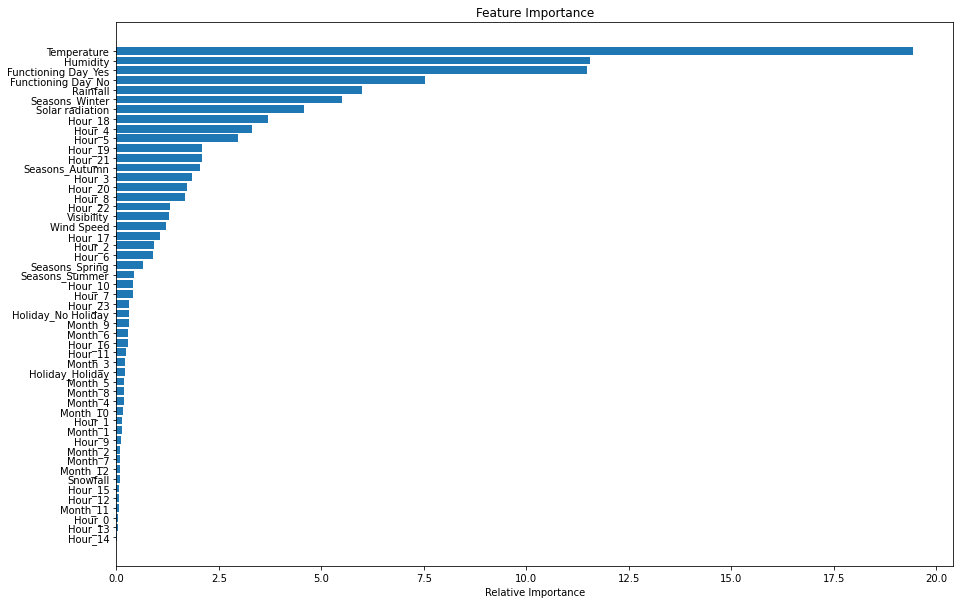

In [116]:
get_features_importance(cb_model,X_train)